In [140]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 3. Install package 

conda install -c conda-forge python=3 geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


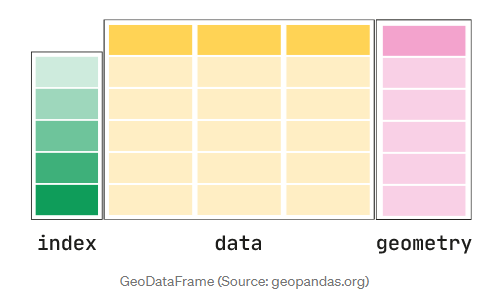


### Coordinate Reference Systems (crs)

The coordinate reference systems tell us how GeodataFrame o GeoSeries relate to places on Earth

#### relevant operations: setting a projection and re-projecting 

setting projection: geopandas.read_file() most of time includes projection information. Check using "Geoseries.crs"
If GeoDataframe does not include projection, hence use data["geometry"].set_crs(epsg=4326) for WGS-84.

### WGS-84: 
The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. It's made up of a reference ellipsoid, a standard coordinate system, altitude data, and a geoid

### Reprojecting:

In somes cases, due to distortions in bidimensional plane and your application of geospatial data, re-projection is required. 

A commonly used default is Universal Transverse Mercator (UTM)







In [141]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [142]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [143]:
# Gettting the character format

base = open(r'../_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

## Covid Data

In [144]:
# Import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv( r'../_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data.head( 5 )

Código Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

In [145]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [146]:
# rename variable to merge later 
cv_data = cv_data.rename({'Código':'UBIGEO'}, axis =1 )
cv_data.head( 5 )

UBIGEO Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

## Shape File

In [147]:
# Upload shape file at district level

maps = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

In [148]:
maps

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  
0     POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
...                                                 ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...  
1872  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...  

[1873 rows x 11 columns]

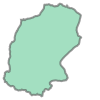

In [149]:
# Plot 1 district
maps["geometry"][0]

In [150]:
## Set of points for first district
maps.geometry[0].boundary.coords.xy

(array('d', [-75.31797010604475, -75.31710488392423, -75.31604648791898, -75.31537303628215, -75.31469932241646, -75.31392881111611, -75.3133303495971, -75.31169723519622, -75.30615235974136, -75.30464848475174, -75.30204673484673, -75.30106448524998, -75.29776760924966, -75.29447260989667, -75.28983985902022, -75.28862698442924, -75.2863086102684, -75.2851563586247, -75.28393560955703, -75.28272260912615, -75.28220311024171, -75.28202736045313, -75.28138673398348, -75.28156248370055, -75.28098236019497, -75.28017386006405, -75.27959373487306, -75.27774798404425, -75.27780860999633, -75.27711523520276, -75.27648235912312, -75.27555073511627, -75.27393360884412, -75.27306448398218, -75.27278123480181, -75.27197261018847, -75.27063673497003, -75.26936310921559, -75.26861523478374, -75.26768548488297, -75.26531248414989, -75.26329098403181, -75.26230660998112, -75.26178710908653, -75.26045898389629, -75.2592461099199, -75.25808785916968, -75.25611910895401, -75.25409760880586, -75.2502148

In [151]:
type(maps.geometry)

geopandas.geoseries.GeoSeries

In [152]:
#Check unique values

maps['IDDIST'].is_unique

maps['IDDIST'].unique().size

1873

In [153]:
# Select only relevant columns
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

In [154]:
maps.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [155]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

In [156]:
#  WGS-84 (longitud-latitud projection) 
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

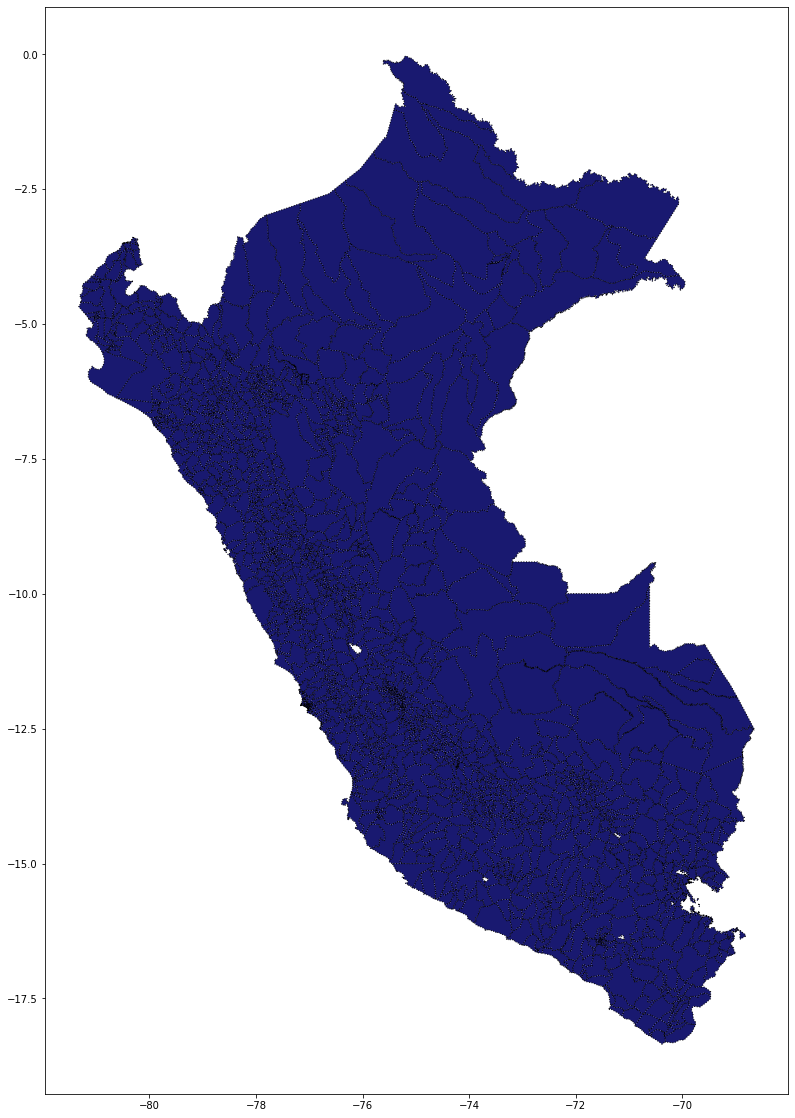

In [157]:
# Plot using geopandas
fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='black' )
plt.show()

## Merge: Covid Data & Shapefile

In [158]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="inner", on="UBIGEO")
dataset_cv

UBIGEO                                           geometry Departamento  \
0      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
1      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
2      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
3      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
4      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
...       ...                                                ...          ...   
40360  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40361  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40362  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40363  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40364  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   

         Provincia         Distrito  Mes   Año  Casos  Muertes Covid  \
0      PUERTO INCA  CODO DEL POZUZO    3  2020      0              0   
1      PUERTO INCA  CODO DEL POZUZO    4  2020      0              1   
2      PUERTO INCA  CODO DEL POZUZO    5  2020      1              0   
3      PUERTO INCA  CODO DEL POZUZO    6  2020      7              0   
4      PUERTO INCA  CODO DEL POZUZO    7  2020     11              1   
...            ...              ...  ...   ...    ...            ...   
40360       HUAURA           HUAURA    9  2021      9              0   
40361       HUAURA           HUAURA   10  2021     11              2   
40362       HUAURA           HUAURA   11  2021     28              1   
40363       HUAURA           HUAURA   12  2021     75              1   
40364       HUAURA           HUAURA    1  2022     39              0   

       Muertes totales  
0                    3  
1                    2  
2                    2  
3                    1  
4                    4  
...                ...  
40360               20  
40361               16  
40362               10  
40363               16  
40364                7  

[40365 rows x 10 columns]

In [159]:
# Function to filter dataset_covid by year, month and administrative space(province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b)]
    else:
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b) & (dataset_cv['Provincia']== c)]
    return resultado  


In [160]:
#Second wave 
base = subdata( 2020 , 8, "All-Peru")  # all peru Aug-2020

#Second wave only Lima
base_lima = subdata( 2020 , 8, "LIMA")  # Lima Aug-2020

In [161]:
base

UBIGEO                                           geometry Departamento  \
5      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
28     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...      HUANUCO   
51     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...      UCAYALI   
74     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...      UCAYALI   
97     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...      UCAYALI   
...       ...                                                ...          ...   
40255  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...      HUANUCO   
40278  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...      HUANUCO   
40301  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...      HUANUCO   
40324  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...         PUNO   
40347  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   

           Provincia                Distrito  Mes   Año  Casos  Muertes Covid  \
5        PUERTO INCA         CODO DEL POZUZO    8  2020    110              3   
28       PUERTO INCA             TOURNAVISTA    8  2020     33              0   
51        PADRE ABAD  ALEXANDER VON HUMBOLDT    8  2020      3              2   
74        PADRE ABAD                 IRAZOLA    8  2020     48              2   
97        PADRE ABAD                 NESHUYA    8  2020     53              2   
...              ...                     ...  ...   ...    ...            ...   
40255  LEONCIO PRADO         CASTILLO GRANDE    8  2020    160              5   
40278  LEONCIO PRADO            PUEBLO NUEVO    8  2020      4              2   
40301  LEONCIO PRADO   SANTO DOMINGO DE ANDA    8  2020     13              0   
40324      SAN ROMAN              SAN MIGUEL    8  2020    100              9   
40347         HUAURA                  HUAURA    8  2020    164             22   

       Muertes totales  
5                    5  
28                   1  
51                   1  
74                   4  
97                   3  
...                ...  
40255                4  
40278                2  
40301                0  
40324               30  
40347               27  

[1755 rows x 10 columns]

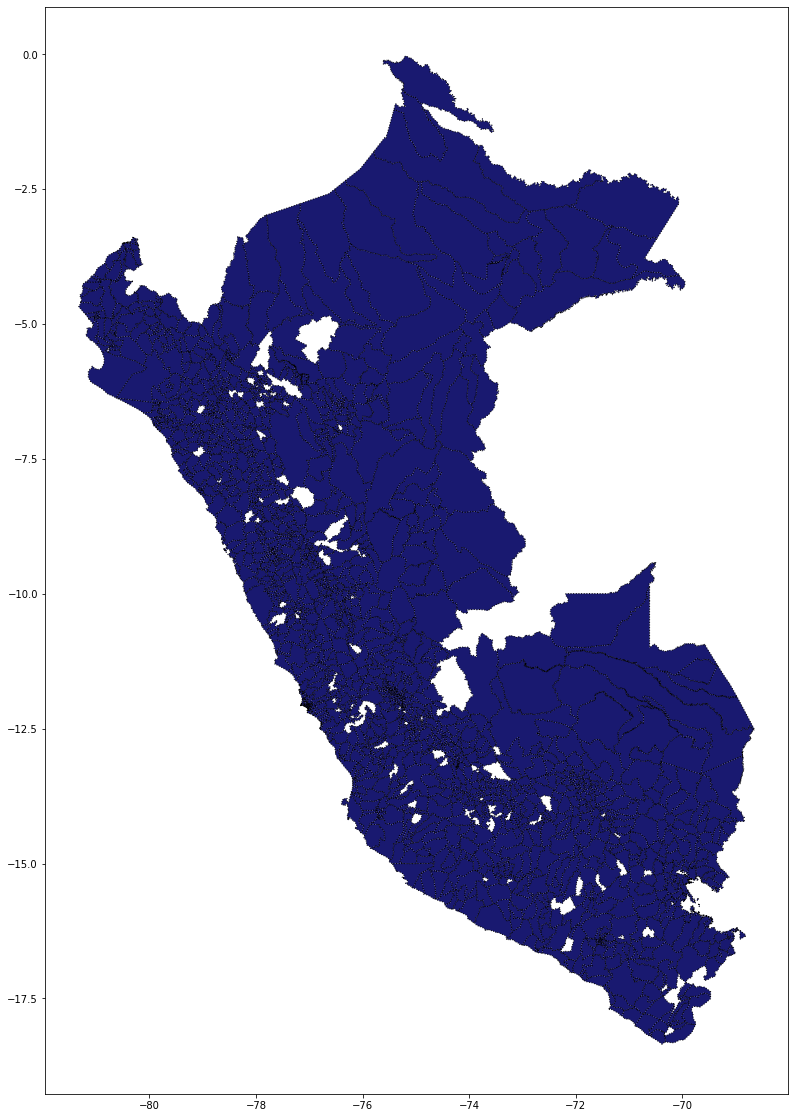

In [162]:
fig, ax = plt.subplots(figsize=(20, 20))

base.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='black' )
plt.show()

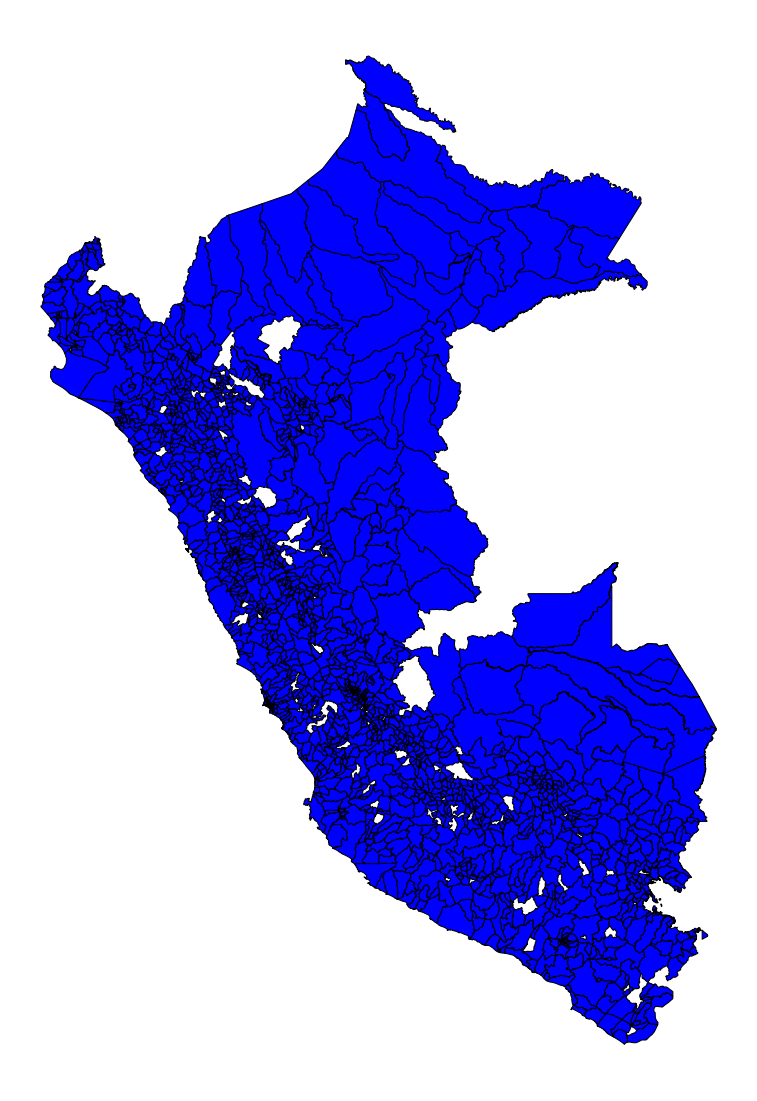

In [163]:
# Plot without axis

fig, ax = plt.subplots(figsize=(20, 20))
base.plot(ax=ax,color='blue', linestyle='-',
                      edgecolor='black')
ax.set_axis_off()

## Plot covid infection at disctrict level 

<AxesSubplot:>

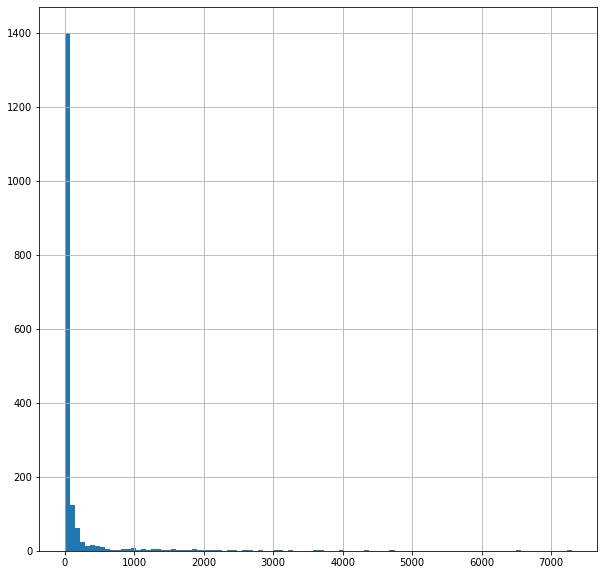

In [164]:
# First always check the distribution
fig, ax = plt.subplots(figsize=(10, 10))
base["Casos"].hist(bins = 100)

<AxesSubplot:>

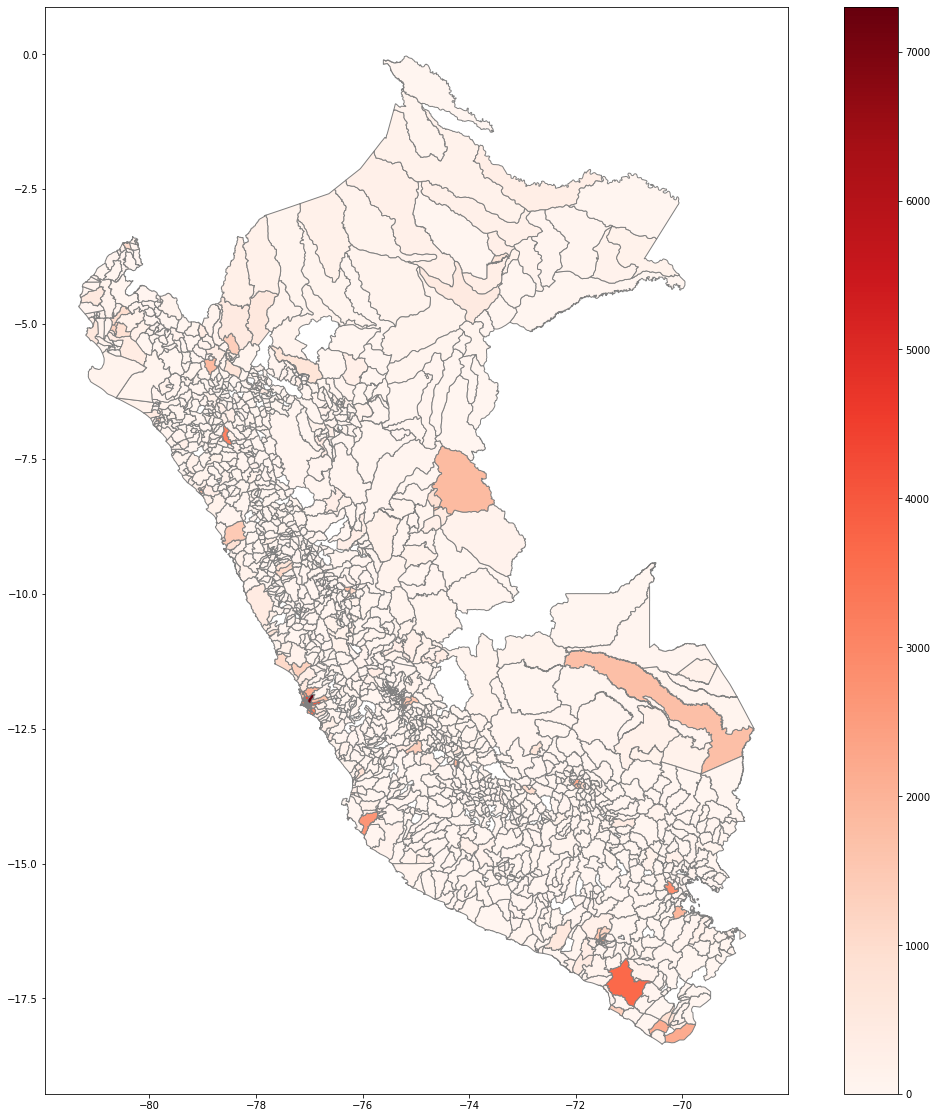

In [165]:
# Plot covid infection at disctrict level 

base.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

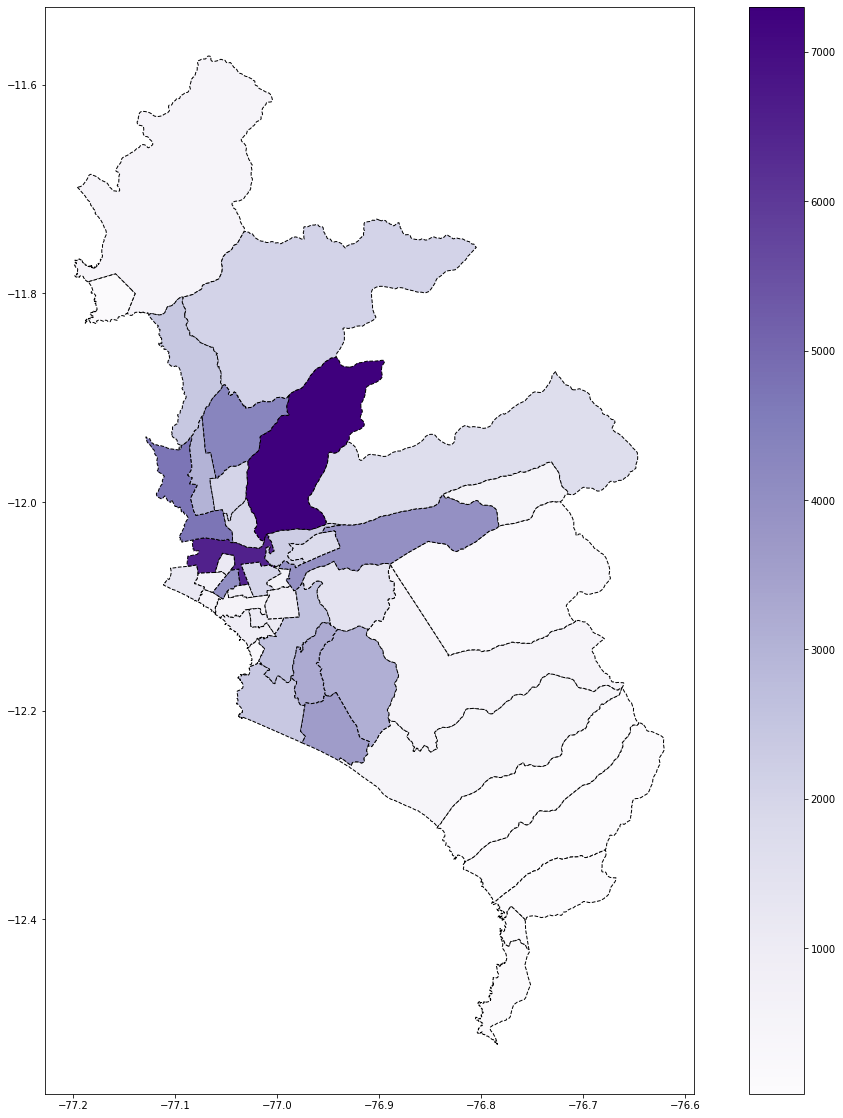

In [166]:
# Covid & Lima Matropolitana 

base_lima.plot(column='Casos', cmap='Purples', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Lima_covid_Heatmap.png')

In [167]:
base_lima.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Get Centroid

In [168]:
# Centroid 

#base_lima = base_lima.to_crs("EPSG:32733")

base_lima['centroid'] = base_lima['geometry'].centroid

<ipython-input-168-67bb7e6c9669>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['centroid'] = base_lima['geometry'].centroid
c:\python\python38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [169]:
base_lima

UBIGEO                                           geometry Departamento  \
8147   150119  POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...         LIMA   
9090   150102  POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...         LIMA   
11689  150131  POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...         LIMA   
11712  150120  POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...         LIMA   
11735  150130  POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...         LIMA   
11758  150116  POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...         LIMA   
11781  150140  POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...         LIMA   
11850  150121  POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...         LIMA   
12379  150139  POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...         LIMA   
15047  150106  POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...         LIMA   
21579  150113  POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...         LIMA   
22131  150124  POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...         LIMA   
22154  150138  MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...         LIMA   
22315  150108  POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...         LIMA   
22384  150104  POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...         LIMA   
22430  150143  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...         LIMA   
22453  150133  POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...         LIMA   
22568  150122  POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...         LIMA   
22614  150141  POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...         LIMA   
23925  150127  POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...         LIMA   
24086  150134  POLYGON ((-76.99780 -12.06084, -76.99810 -12.0...         LIMA   
24109  150136  POLYGON ((-77.07857 -12.06228, -77.07815 -12.0...         LIMA   
24546  150142  POLYGON ((-76.94232 -12.18247, -76.93731 -12.1...         LIMA   
24569  150126  POLYGON ((-76.65267 -12.19256, -76.65207 -12.1...         LIMA   
25857  150129  POLYGON ((-76.67773 -12.33800, -76.67787 -12.3...         LIMA   
26271  150123  POLYGON ((-76.88134 -12.07220, -76.86137 -12.1...         LIMA   
26317  150115  POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...         LIMA   
26340  150114  POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...         LIMA   
26386  150105  POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...         LIMA   
26593  150137  POLYGON ((-76.93981 -12.03913, -76.93796 -12.0...         LIMA   
26662  150109  POLYGON ((-76.72948 -11.99943, -76.72596 -11.9...         LIMA   
27743  150101  POLYGON ((-77.00474 -12.04166, -77.00296 -12.0...         LIMA   
27766  150111  POLYGON ((-76.94408 -12.02075, -76.94348 -12.0...         LIMA   
27789  150128  POLYGON ((-77.02034 -12.01783, -77.02032 -12.0...         LIMA   
27812  150103  POLYGON ((-76.83508 -11.99627, -76.83467 -11.9...         LIMA   
27835  150107  POLYGON ((-76.72918 -11.96426, -76.72809 -11.9...         LIMA   
27858  150112  POLYGON ((-77.02858 -11.96462, -77.02794 -11.9...         LIMA   
27904  150135  POLYGON ((-77.08576 -11.94869, -77.08557 -11.9...         LIMA   
27927  150117  POLYGON ((-77.07044 -11.95013, -77.07008 -11.9...         LIMA   
27950  150110  POLYGON ((-77.04639 -11.89743, -77.04551 -11.8...         LIMA   
27973  150118  POLYGON ((-76.71091 -11.89215, -76.70963 -11.8...         LIMA   
27996  150132  POLYGON ((-76.92923 -11.87063, -76.92891 -11.8...         LIMA   
28042  150125  POLYGON ((-77.09076 -11.81966, -77.09066 -11.8...         LIMA   

      Provincia                 Distrito  Mes   Año  Casos  Muertes Covid  \
8147       LIMA                    LURIN    8  2020    452             29   
9090       LIMA                    ANCON    8  2020    460             30   
11689      LIMA               SAN ISIDRO    8  2020    551             30   
11712      LIMA        MAGDALENA DEL MAR    8  2020    478             49   
11735      LIMA                SAN BORJA    8  2020   101

In [170]:
# fig, ax = plt.subplots(figsize=(20, 20))

# # Heatmap Lima and Covid infection

# base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
#                       edgecolor='black', 
#                       legend = True, ax=ax)

In [171]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)
props

{'boxstyle': 'round', 'facecolor': 'linen', 'alpha': 1}

In [172]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

## Add District Names in Centroid

<AxesSubplot:>

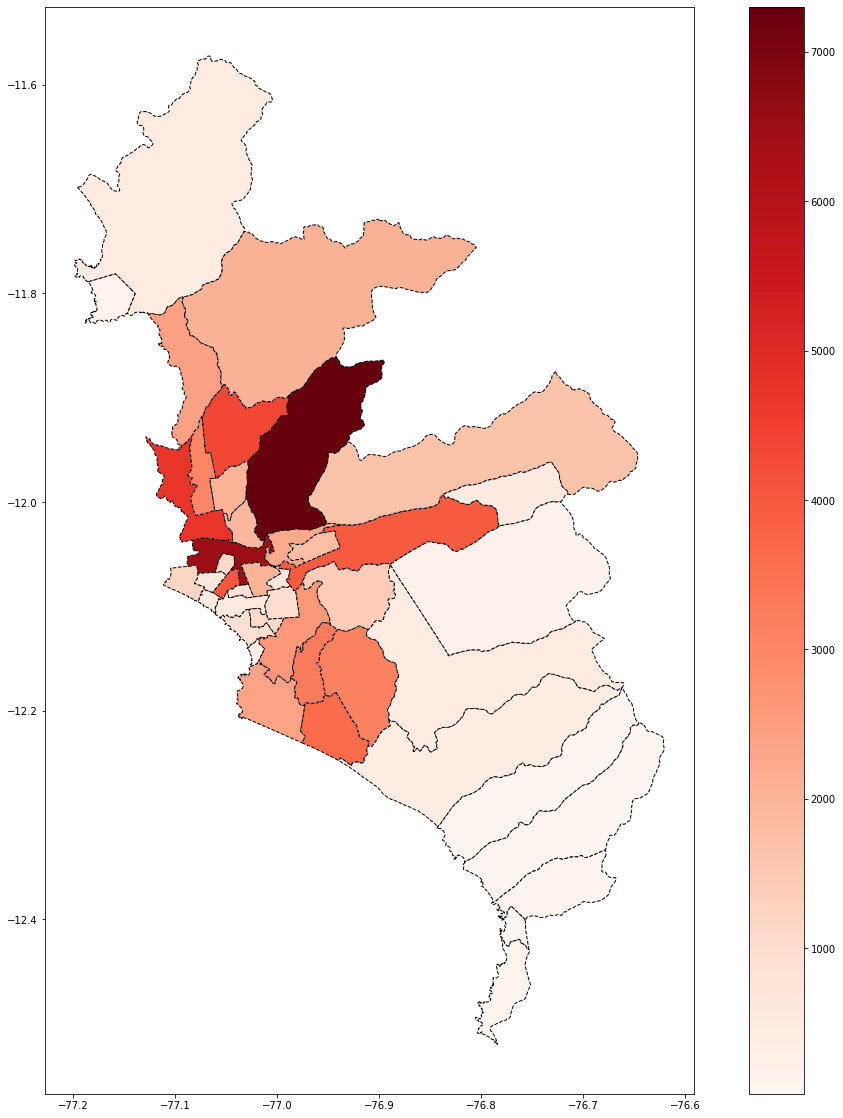

In [173]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

In [174]:
#base_lima['centroid']

In [175]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

In [176]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

In [177]:
props

{'boxstyle': 'round', 'facecolor': 'linen', 'alpha': 1}

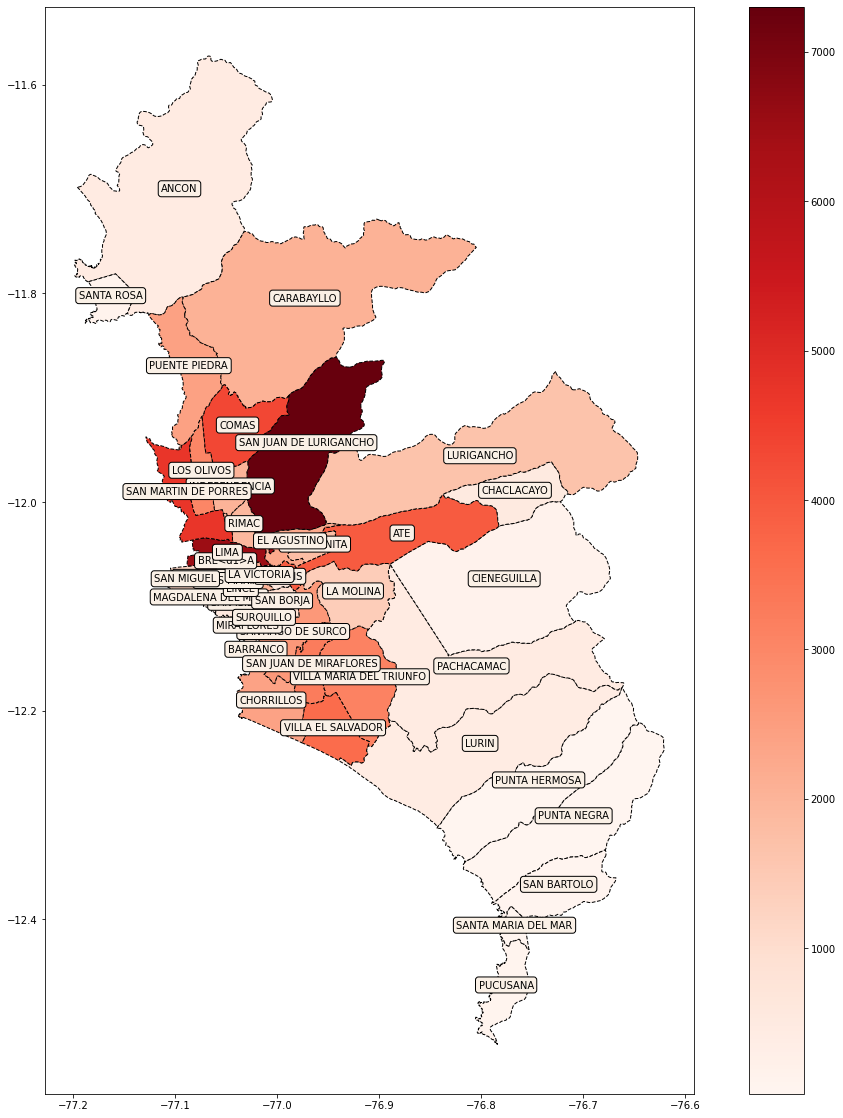

In [178]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

# add district name in litle box

props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

for point in base_lima.iterrows():
        ax.text( point[1]['centroid'].x,
                 point[1]['centroid'].y,
                 point[1]['Distrito'],
                 horizontalalignment='center',
                 fontsize=10,
                 bbox=props )

plt.savefig(r'Lima_covid_Heatmap_2.png')
#plot.savefig(r'Lima_covid_Heatmap_2.png')

<AxesSubplot:>

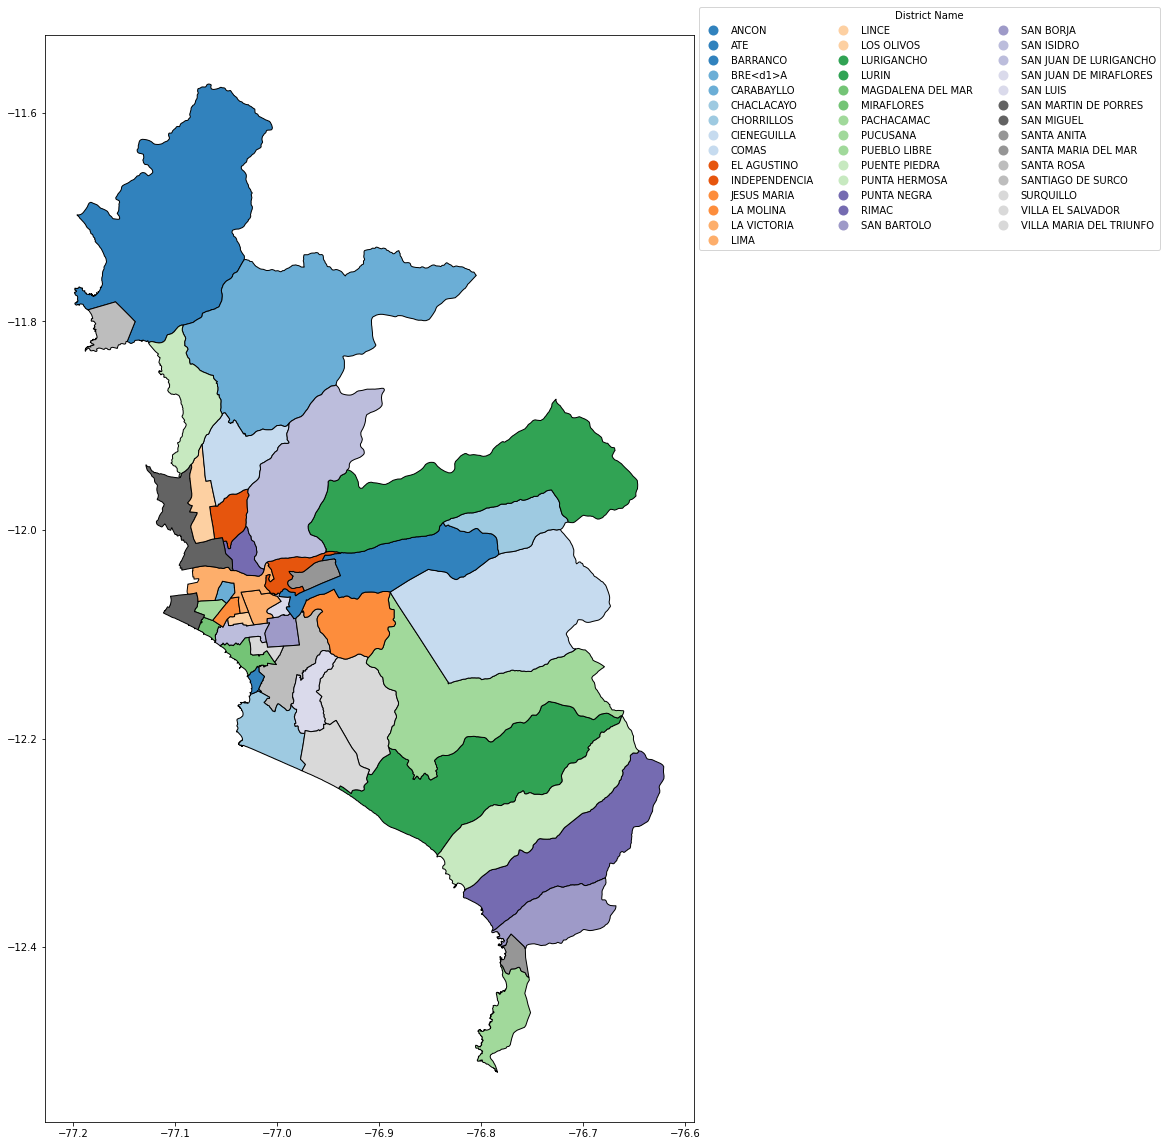

In [179]:
# Using legend by district 

leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}


base_lima.plot(column='Distrito', cmap='tab20c', figsize=(20, 20), legend = True, linestyle='-', 
               edgecolor='black',
               legend_kwds = leg_kwds)

## Public Health Centers Data

In [185]:
base_lima.geometry.iloc[1:2]

9090    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...
Name: geometry, dtype: geometry

In [186]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../_data/centros_hospitalarios.csv')
health_centers.head( 5 )

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...    Estado  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...  ACTIVADO              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...  ACTIVADO              
2  200703              URB. SUD AMERICA D-14 TALARA  ...  ACTIVADO              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...  ACTIVADO              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...  ACTIVADO              

           Condición Inspección      NORTE      ESTE  COTA CAMAS code1 code2  
0  EN FUNCIONAMIENTO            -81.310632 -4.665043  15.3   NaN    19     1  
1  EN FUNCIONAMIENTO            -81.306508 -4.654384  20.4   NaN    19     1  
2  EN FUNCIONAMIENTO            -81.303974 -4.658634  41.6   NaN     4     1  
3  EN FUNCIONAMIENTO            -81.275139 -4.456625  39.4   NaN    19     1  
4  EN FUNCIONAMIENTO            -81.273840 -4.568419  28.7  35.0    12     3  

[5 rows x 35 columns]

In [187]:
health_centers.columns

Index(['Institución', 'Código Único', 'Nombre del establecimiento',
       'Clasificación', 'Tipo', 'Departamento', 'Provincia', 'Distrito',
       'UBIGEO', 'Dirección', 'Código DISA', 'Código Red', 'Código Microrred',
       'DISA', 'Red', 'Microrred', 'Código UE', 'Unidad Ejecutora',
       'Categoria', 'Teléfono', 'Tipo Doc.Categorización',
       'Nro.Doc.Categorización', 'Horario', 'Inicio de Actividad',
       'Director Médico y/o Responsable de la Atención de Salud', 'Estado',
       'Situación', 'Condición', 'Inspección', 'NORTE', 'ESTE', 'COTA',
       'CAMAS', 'code1', 'code2'],
      dtype='object')

In [188]:
health_centers.NORTE

0      -81.310632
1      -81.306508
2      -81.303974
3      -81.275139
4      -81.273840
          ...    
8459          NaN
8460          NaN
8461          NaN
8462          NaN
8463          NaN
Name: NORTE, Length: 8464, dtype: float64

In [189]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame( health_centers, geometry=gpd.points_from_xy( health_centers.NORTE, health_centers.ESTE ) )
Public_health.head( 5 )

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...              
2  200703              URB. SUD AMERICA D-14 TALARA  ...              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              

           Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
0  EN FUNCIONAMIENTO             -81.310632 -4.665043  15.3    NaN    19   
1  EN FUNCIONAMIENTO             -81.306508 -4.654384  20.4    NaN    19   
2  EN FUNCIONAMIENTO             -81.303974 -4.658634  41.6    NaN     4   
3  EN FUNCIONAMIENTO             -81.275139 -4.456625  39.4    NaN    19   
4  EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   

  code2                    geometry  
0     1  POINT (-81.31063 -4.66504)  
1     1  POINT (-81.30651 -4.65438)  
2     1  POINT (-81.30397 -4.65863)  
3     1  POINT (-81.27514 -4.45663)  
4     3  POINT (-81.27384 -4.56842)  

[5 rows x 36 columns]

In [190]:
# Setting UTM Zones (South): "EPSG:32733"

# Public_health = Public_health.set_crs("EPSG:32733")
Public_health = Public_health.set_crs( "EPSG:32718", allow_override = True)
Public_health.crs

<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [191]:
Public_health.head( 5 )

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...              
2  200703              URB. SUD AMERICA D-14 TALARA  ...              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              

           Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
0  EN FUNCIONAMIENTO             -81.310632 -4.665043  15.3    NaN    19   
1  EN FUNCIONAMIENTO             -81.306508 -4.654384  20.4    NaN    19   
2  EN FUNCIONAMIENTO             -81.303974 -4.658634  41.6    NaN     4   
3  EN FUNCIONAMIENTO             -81.275139 -4.456625  39.4    NaN    19   
4  EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   

  code2                geometry  
0     1  POINT (-81.311 -4.665)  
1     1  POINT (-81.307 -4.654)  
2     1  POINT (-81.304 -4.659)  
3     1  POINT (-81.275 -4.457)  
4     3  POINT (-81.274 -4.568)  

[5 rows x 36 columns]

## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [192]:
Public_health.head( 5 )

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...              
2  200703              URB. SUD AMERICA D-14 TALARA  ...              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              

           Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
0  EN FUNCIONAMIENTO             -81.310632 -4.665043  15.3    NaN    19   
1  EN FUNCIONAMIENTO             -81.306508 -4.654384  20.4    NaN    19   
2  EN FUNCIONAMIENTO             -81.303974 -4.658634  41.6    NaN     4   
3  EN FUNCIONAMIENTO             -81.275139 -4.456625  39.4    NaN    19   
4  EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   

  code2                geometry  
0     1  POINT (-81.311 -4.665)  
1     1  POINT (-81.307 -4.654)  
2     1  POINT (-81.304 -4.659)  
3     1  POINT (-81.275 -4.457)  
4     3  POINT (-81.274 -4.568)  

[5 rows x 36 columns]

In [193]:
# code1 = 19 to postas médicas 
# code1 = 12 & 24 to Hospitals

Public_health1 = Public_health[Public_health.code1 == "19"]

Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2.head( 5 )

Institución  Código Único              Nombre del establecimiento  \
4             ESSALUD         12243              HOSPITAL II ESSALUD TALARA   
5   GOBIERNO REGIONAL          2074                               TALARA II   
19            ESSALUD         11763  HOSPITAL I MIGUEL CRUZADO VERA - PAITA   
20  GOBIERNO REGIONAL          2021            HOSPITAL  LAS MERCEDES-PAITA   
23  GOBIERNO REGIONAL          2026                   PUEBLO NUEVO DE COLAN   

                                  Clasificación  \
4     HOSPITALES O CLINICAS DE ATENCION GENERAL   
5   CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   
19  CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   
20    HOSPITALES O CLINICAS DE ATENCION GENERAL   
23  CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   

                                          Tipo Departamento Provincia  \
4   ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA   
5   ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA   
19  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   
20  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   
23  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   

   Distrito  UBIGEO                                 Dirección  ...  Situación  \
4   PARIÑAS  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              
5   PARIÑAS  200701  AVENIDA GRAU S/N EXPOLICLINICO PETROPERU  ...              
19    PAITA  200501            CARRETERA PAITA - PIURA KM 1.5  ...              
20    PAITA  200501               LOS PESCADORES S/N LA PUNTA  ...              
23    COLAN  200504                    JR. ALFONSO UGARTE S/N  ...              

            Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
4   EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   
5   EN FUNCIONAMIENTO             -81.272096 -4.578829  21.1    NaN    24   
19  EN FUNCIONAMIENTO             -81.100243 -5.087583  75.9   12.0    24   
20  EN FUNCIONAMIENTO             -81.091531 -5.090815  78.3   79.0    12   
23  EN FUNCIONAMIENTO             -81.058005 -4.911551  16.6    NaN    24   

   code2                geometry  
4      3  POINT (-81.274 -4.568)  
5      3  POINT (-81.272 -4.579)  
19     3  POINT (-81.100 -5.088)  
20     3  POINT (-81.092 -5.091)  
23     3  POINT (-81.058 -4.912)  

[5 rows x 36 columns]

In [194]:
# # Quantiles quantity of infection 

# base_lima.plot(column='Casos', cmap='Set2', figsize=(20, 20), linestyle=':', 
#                edgecolor='black',
#                legend = True)

In [195]:
# Postas Médicas and Hospitales públicos - LIMA

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

Institución  Código Único  \
2715       MINSA          5814   
2803       MINSA          5816   
2832     ESSALUD          8564   
2852       MINSA          5817   
2859       MINSA          7632   
2862       MINSA          5799   
2875       MINSA          5821   
2879       MINSA          6196   
2887       MINSA          6214   
2904       MINSA          5772   
2905     ESSALUD          8671   
2912       MINSA          5755   
2927       MINSA          5791   
2943     ESSALUD          9188   
2955       MINSA          6207   
2984       MINSA          5644   
2988     ESSALUD          8502   
2997     ESSALUD          8489   
3009       MINSA          6162   
3017       MINSA          6178   
3023       MINSA          6175   
3027       MINSA          5991   
3036       MINSA          5735   
3040       MINSA          6206   
3048       MINSA          5842   
3071       MINSA          5998   
3077       MINSA          5617   
3093       MINSA          5966   
3096     ESSALUD          8317   
3161       MINSA          6750   
3164       MINSA          6104   
3175       MINSA          6107   
3204       MINSA          6152   
3213       MINSA          6132   
3214     ESSALUD         10135   
3216       MINSA          6153   
3217       MINSA          6133   
3230     ESSALUD         18580   
3238       MINSA          6151   
3255       MINSA          6164   
3262       MINSA          6124   
3269       MINSA          5945   
3284       MINSA          6141   
3322       MINSA          6079   
3363       MINSA          5883   
3370       MINSA          5978   
3382       MINSA          5938   
3508       MINSA          5947   
7909     ESSALUD          8318   

                             Nombre del establecimiento  \
2715             CENTRO DE SALUD MATERNO INFANTIL ANCON   
2803         MATERNO INFANTIL DR. ENRIQUE MARTIN ALTUNA   
2832                   HOSPITAL I OCTAVIO MONGRUT MUÑOZ   
2852                                         SANTA ROSA   
2859                   HOSPITAL CARLOS LANFRANCO LA HOZ   
2862                                 CLAS JUAN PABLO II   
2875                                        LOS SUREÑOS   
2879                                          MAGDALENA   
2887                      HOSPITAL VICTOR LARCO HERRERA   
2904           CENTRO MATERNO INFANTIL SANTA LUZMILA II   
2905                    HOSPITAL I MARINO MOLINA SCIPPA   
2912            CENTRO MATERNO INFANTIL LAURA RODRIGUEZ   
2927                                 TAHUANTINSUYO BAJO   
2943                         HOSPITAL II RAMÓN CASTILLA   
2955                          NACIONAL ARZOBISPO LOAYZA   
2984                                              RIMAC   
2988                      HOSPITAL III EMERGENCIAS GRAU   
2997               ESSALUD - HOSPITAL II SUÁREZ ANGAMOS   
3009  CENTRO DE EMERGENCIAS SAN PEDRO DE LOS CHORRILLOS   
3017                          CENTRO DE SALUD SURQUILLO   
3023                                        EL PORVENIR   
3027  CENTRO MATERNO INFANTIL DE SALUD - "VIRGEN DEL...   
3036                                        EL PROGRESO   
3040                              NACIONAL  DOS DE MAYO   
3048                                        PIEDRA LIZA   
3071                              BUENOS AIRES DE VILLA   
3077                    HOSPITAL SAN JUAN DE LURIGANCHO   
3093                                       SAN FERNANDO   
3096                HOSPITAL AURELIO DIAZ UFANO Y PERAL   
3161                                        SANTA ANITA   
3164                                     MANUEL BARRETO   
3175                                           OLLANTAY   
3204                             JOSE CARLOS MARIATEGUI   
3213                   CENTRO MATERNO INFANTIL SAN JOSE   
3214            HOSPITAL I CARLOS ALCANTARA BUTTERFIELD   
3216                             DANIEL ALCIDES CARRION   
3217              CENTRO MATERNO INFANTIL JUAN PABLO II   
3230                     GUILLERMO KAELIN  DE LA FUENTE   
323

## Covid y Postas

<AxesSubplot:>

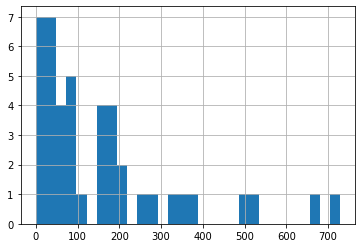

In [196]:
base_lima["Muertes Covid"].hist(bins=30)

In [252]:
PH_lima_postas

Institución  Código Único  \
2725       MINSA          5824   
2728       MINSA         14727   
2740       MINSA         16525   
2762       MINSA          5825   
2797       MINSA          5750   
...          ...           ...   
3486       MINSA          5868   
3516       MINSA          5870   
3519       MINSA          5867   
8125       MINSA          5940   
8184       MINSA         23635   

                             Nombre del establecimiento  \
2725                                           SAN JOSE   
2728                                             PROFAM   
2740                                    VILLAS DE ANCON   
2762                             VIRGEN DE LAS MERCEDES   
2797                                     CERRO LA REGLA   
...                                                 ...   
3486                              SEÑOR DE LOS MILAGROS   
3516                                       PABLO PATRON   
3519                                  MARISCAL CASTILLA   
8125                                           HUASCATA   
8184  RED DE SERVICIOS DE SALUD SAN JUAN DE MIRAFLOR...   

                           Clasificación  \
2725  PUESTOS DE SALUD O POSTAS DE SALUD   
2728  PUESTOS DE SALUD O POSTAS DE SALUD   
2740  PUESTOS DE SALUD O POSTAS DE SALUD   
2762  PUESTOS DE SALUD O POSTAS DE SALUD   
2797  PUESTOS DE SALUD O POSTAS DE SALUD   
...                                  ...   
3486  PUESTOS DE SALUD O POSTAS DE SALUD   
3516  PUESTOS DE SALUD O POSTAS DE SALUD   
3519  PUESTOS DE SALUD O POSTAS DE SALUD   
8125  PUESTOS DE SALUD O POSTAS DE SALUD   
8184  PUESTOS DE SALUD O POSTAS DE SALUD   

                                            Tipo Departamento Provincia  \
2725  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2728  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2740  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2762  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2797  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
...                                          ...          ...       ...   
3486  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
3516  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
3519  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
8125  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
8184  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   

                  Distrito  UBIGEO  \
2725                 ANCON  150102   
2728            SANTA ROSA  150139   
2740                 ANCON  150102   
2762            SANTA ROSA  150139   
2797  SAN MARTIN DE PORRES  150135   
...                    ...     ...   
3486            LURIGANCHO  150118   
3516            LURIGANCHO  150118   
3519            LURIGANCHO  150118   
8125            CHACLACAYO  150107   
8184                  LIMA  150101   

                                              Dirección  ...  Situación  \
2725  ESQ. CALLE Nº 17 Y CALLE Nº 9 URB. DE INTERES ...  ...              
2728  AV. SANTA ROSA, MANZANA O-2 / ASOCIACION DE VI...  ...              
2740       MZ X ASOCIACION PRO-VIVIENDA VILLAS DE ANCON  ...              
2762                 ASOC. VIV. SANTA ROSA MZ. B LT. 09  ...              
2797              MZ B LT 11 - AAHH ESPERANZA, COMITÉ 2  ...              
...                                                 ...  ...        ...   
3486  AVENIDA AV.PRECURSORES S/N AAHH NICOLAS DE PIE...  ...              
3516  AAHH PABLO PATRON - CALLE 14 MZ. V LOTE 7 DIST...  ...              
3519  CALLE SANTA ROSA MZ O S/N - AAHH MARISCAL CAST...  ...              
8125  OTROS MZ N LOTE 05 AAHH CERRO VECINO HUASCATA-...  ...              
8184  OTROS AA.HH. Virgen del Guadalupe MANZANA E LO...  ...              

              Condición  Inspección      NORTE       ESTE   COTA  CAMAS code1  \
2725  EN FUNCIONAM

<AxesSubplot:>

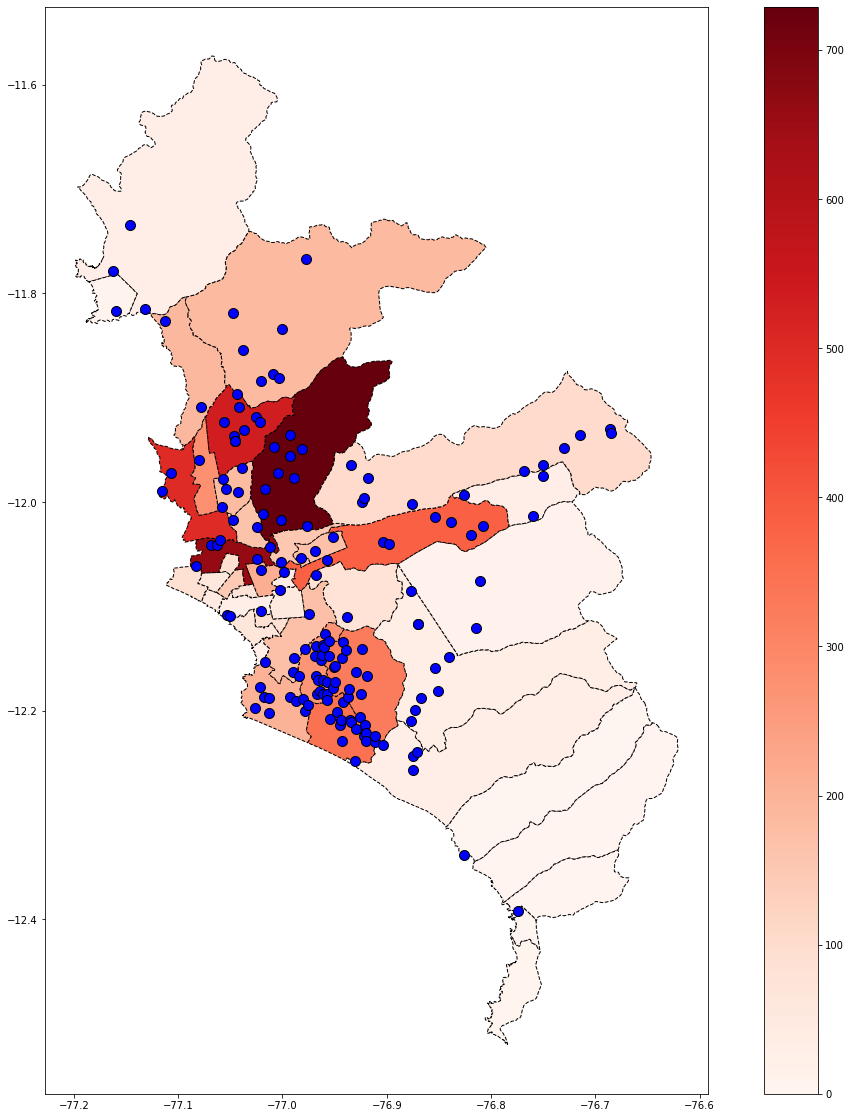

In [197]:
# Covid deaths and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot( column='Muertes Covid', 
               cmap='Reds', 
               linestyle='--',
               edgecolor='black', 
               legend = True, 
               ax=ax )

# Plot in the shapefile (R style)
PH_lima_postas.plot(ax = ax, color = 'blue', markersize=100, edgecolor='black')

## Hospitales Públicos y Postas Médicas

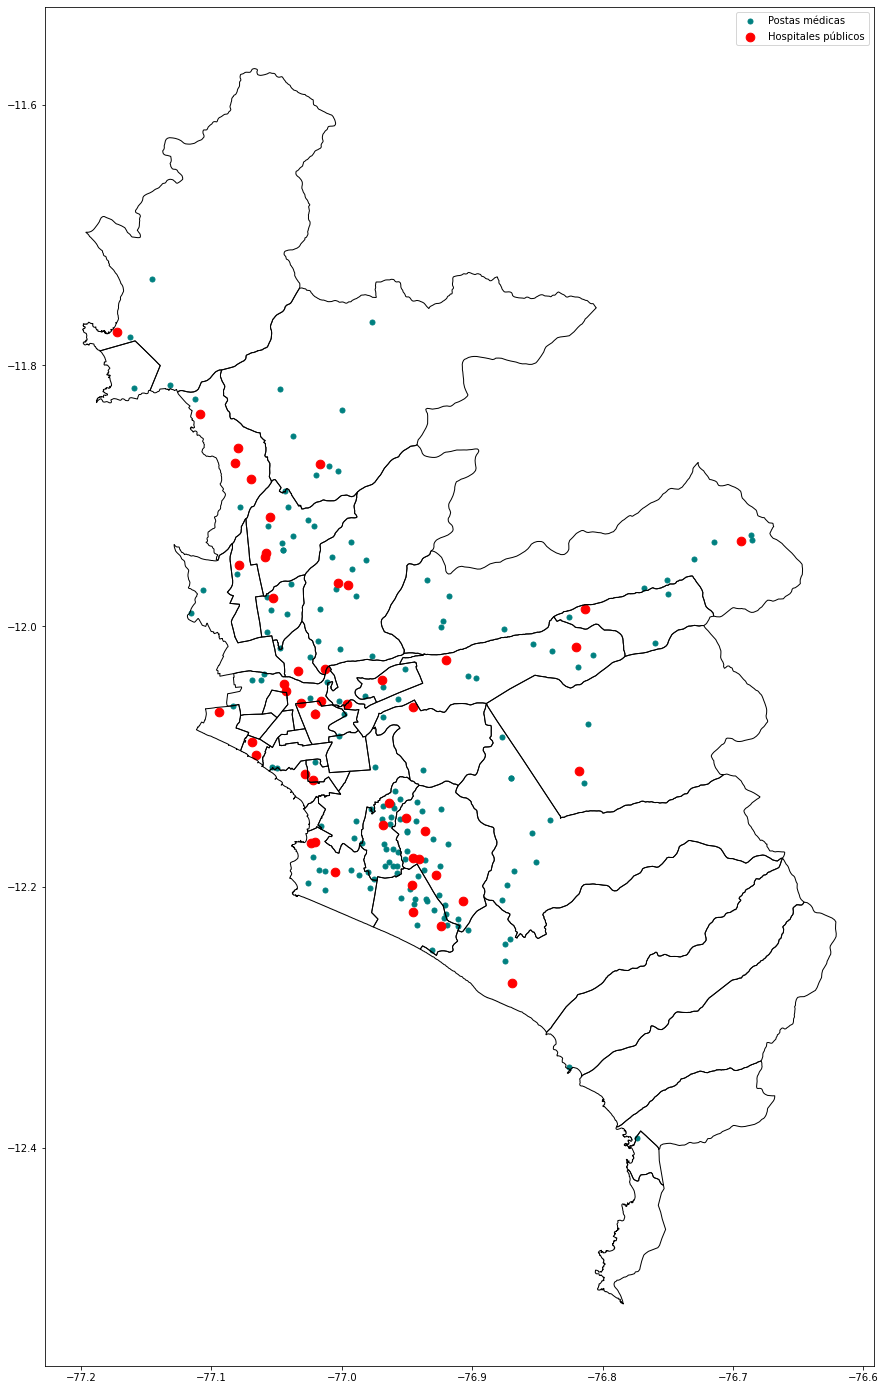

In [198]:
ax = base_lima.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)

PH_lima_postas.plot(color='teal', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

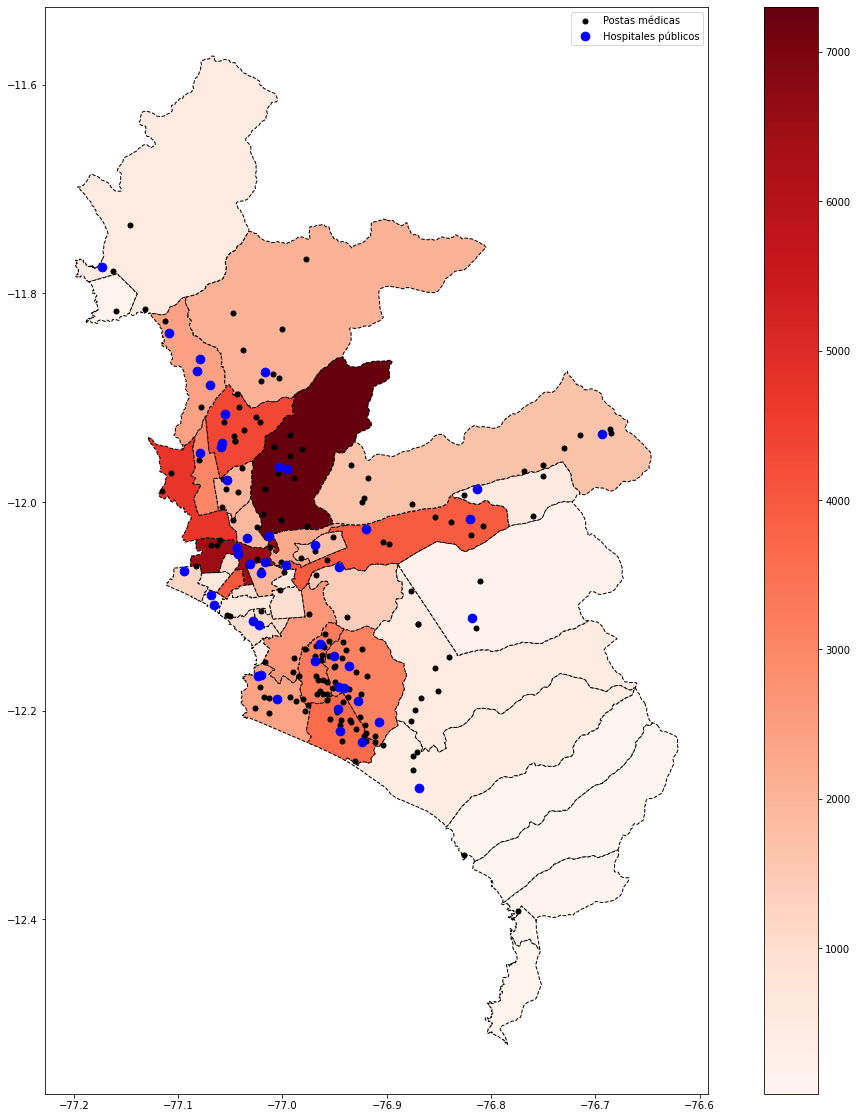

In [199]:
# Covid infection and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_postas.plot(color='black', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='blue', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

In [256]:
PH_lima_hospitales['CAMAS'].describe

<bound method NDFrame.describe of 2715      NaN
2803      NaN
2832     49.0
2852      NaN
2859    102.0
2862      NaN
2875      NaN
2879      NaN
2887    590.0
2904      NaN
2905    106.0
2912      NaN
2927      NaN
2943     49.0
2955    662.0
2984      NaN
2988    231.0
2997     84.0
3009      NaN
3017      NaN
3023      NaN
3027      NaN
3036      NaN
3040    594.0
3048      NaN
3071      NaN
3077    150.0
3093      6.0
3096     54.0
3161      6.0
3164      NaN
3175      NaN
3204      NaN
3213      NaN
3214     50.0
3216      NaN
3217      NaN
3230    199.0
3238      NaN
3255      NaN
3262      NaN
3269    111.0
3284      NaN
3322      NaN
3363     51.0
3370      NaN
3382     10.0
3508     67.0
7909     57.0
Name: CAMAS, dtype: float64>

In [201]:
# drop raws with nan values 

PH_lima_hospitales = PH_lima_hospitales.dropna(subset=['CAMAS'])

In [258]:
#markersize

## Relative Size of Markers from panda series

In [202]:
PH_lima_hospitales["CAMAS"]

2832     49.0
2859    102.0
2887    590.0
2905    106.0
2943     49.0
2955    662.0
2988    231.0
2997     84.0
3040    594.0
3077    150.0
3093      6.0
3096     54.0
3161      6.0
3214     50.0
3230    199.0
3269    111.0
3363     51.0
3382     10.0
3508     67.0
7909     57.0
Name: CAMAS, dtype: float64

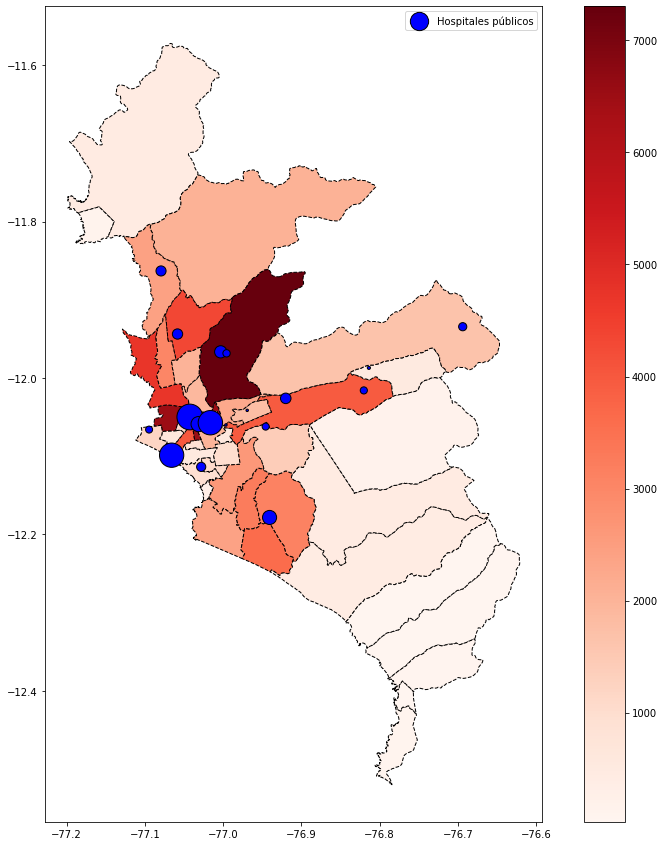

In [203]:
# Covid infection and Public Hospital by number of beds 

fig, ax = plt.subplots(figsize=(15, 15))

markersize=PH_lima_hospitales['CAMAS']

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_hospitales.plot( ax=ax, color='blue', label = "Hospitales públicos", markersize = markersize,
                       edgecolor='black')
plt.legend(loc='upper right')

<AxesSubplot:>

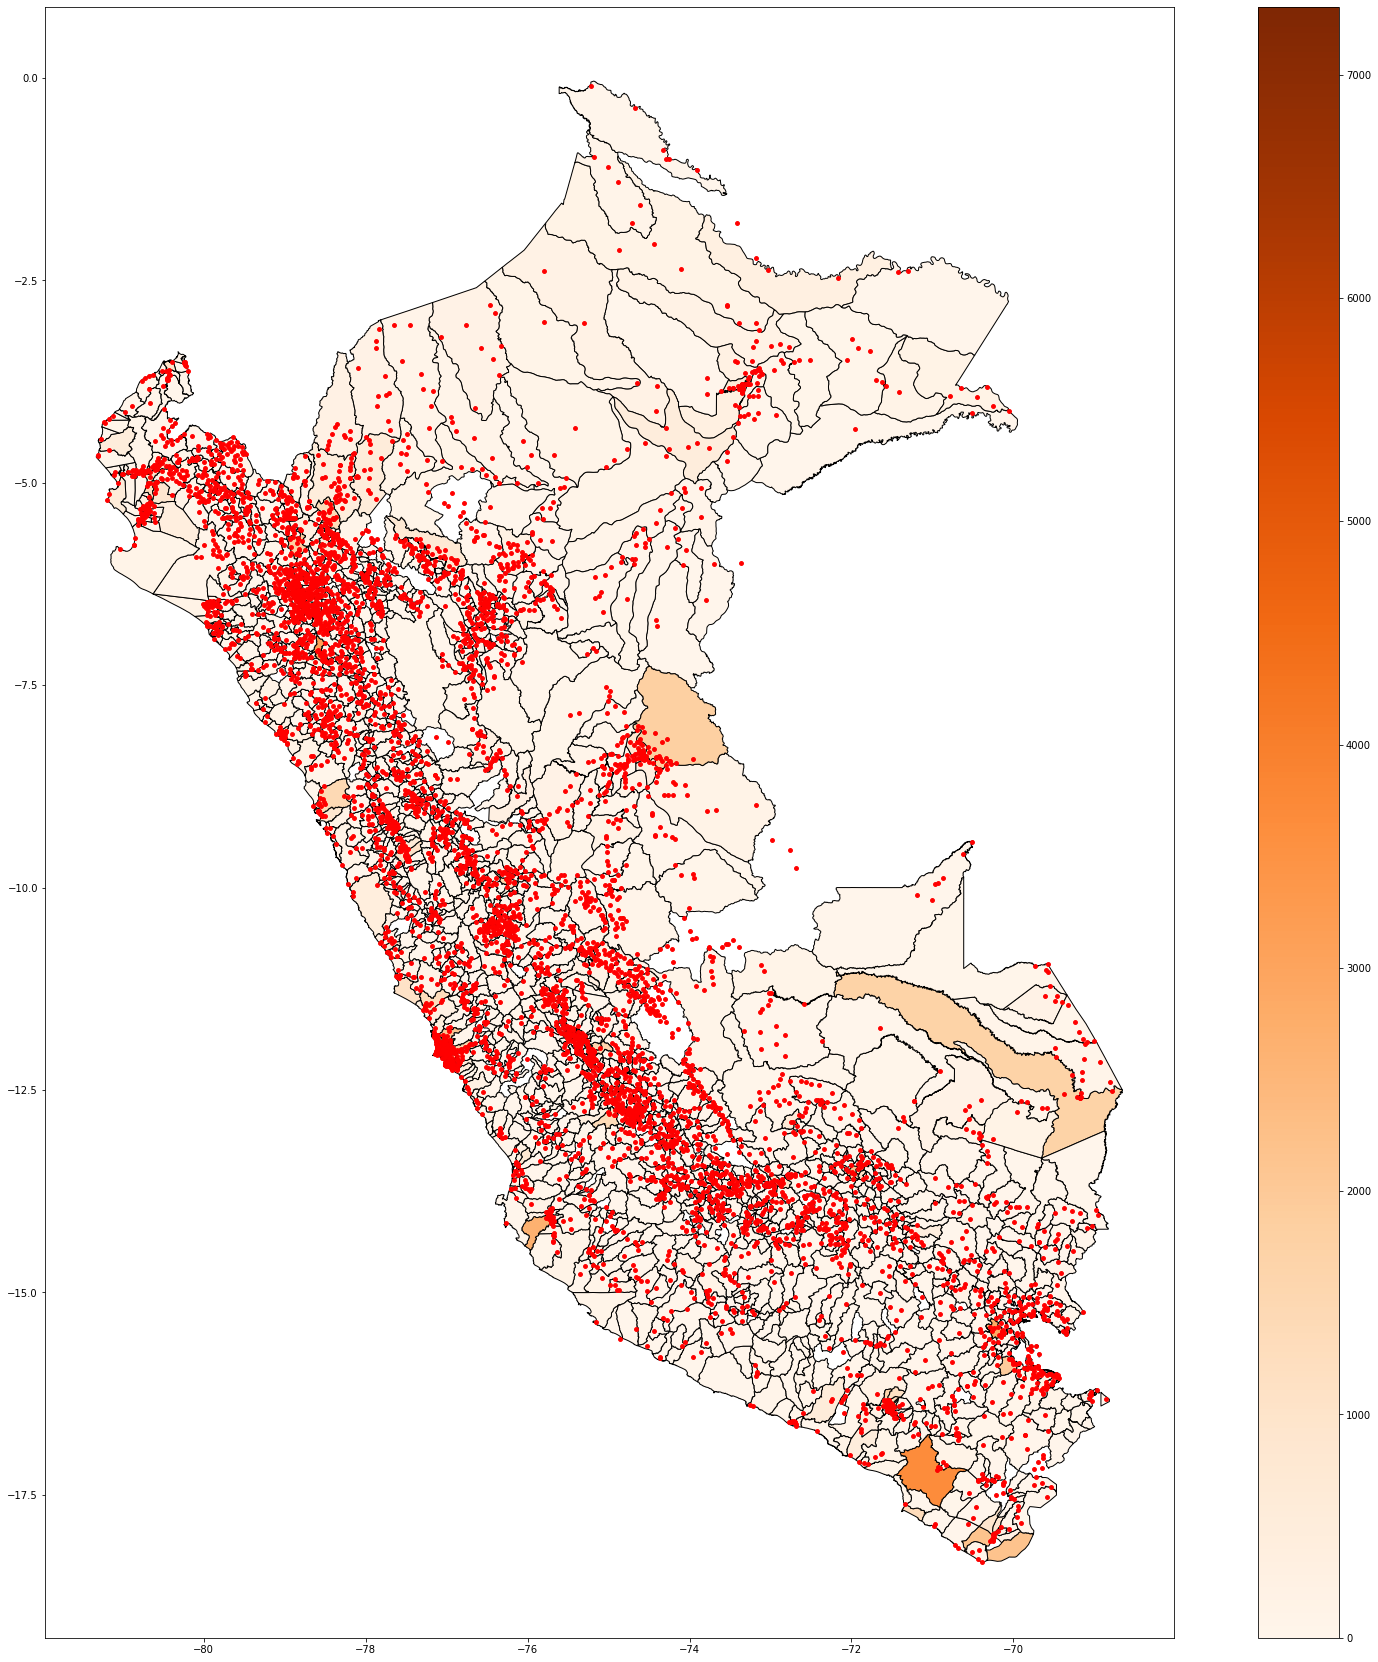

In [204]:
# Covid infection & postas médicas at the national level 

gf = base.plot(column='Casos', cmap='Oranges', 
          figsize=(30, 30),
          linestyle='-',
          edgecolor='black',
          legend = True)

Public_health1.plot(ax = gf, color = 'red', markersize=15)

## Select Districts

In [205]:
base_lima = base_lima.set_index("Distrito")

In [206]:
base_lima

UBIGEO  \
Distrito                          
LURIN                    150119   
ANCON                    150102   
SAN ISIDRO               150131   
MAGDALENA DEL MAR        150120   
SAN BORJA                150130   
LINCE                    150116   
SANTIAGO DE SURCO        150140   
PUEBLO LIBRE             150121   
SANTA ROSA               150139   
CARABAYLLO               150106   
JESUS MARIA              150113   
PUCUSANA                 150124   
SANTA MARIA DEL MAR      150138   
CHORRILLOS               150108   
BARRANCO                 150104   
VILLA MARIA DEL TRIUNFO  150143   
SAN JUAN DE MIRAFLORES   150133   
MIRAFLORES               150122   
SURQUILLO                150141   
PUNTA NEGRA              150127   
SAN LUIS                 150134   
SAN MIGUEL               150136   
VILLA EL SALVADOR        150142   
PUNTA HERMOSA            150126   
SAN BARTOLO              150129   
PACHACAMAC               150123   
LA VICTORIA              150115   
LA MOLINA                150114   
BRE<d1>A                 150105   
SANTA ANITA              150137   
CIENEGUILLA              150109   
LIMA                     150101   
EL AGUSTINO              150111   
RIMAC                    150128   
ATE                      150103   
CHACLACAYO               150107   
INDEPENDENCIA            150112   
SAN MARTIN DE PORRES     150135   
LOS OLIVOS               150117   
COMAS                    150110   
LURIGANCHO               150118   
SAN JUAN DE LURIGANCHO   150132   
PUENTE PIEDRA            150125   

                                                                  geometry  \
Distrito                                                                     
LURIN                    POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...   
ANCON                    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...   
SAN ISIDRO               POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...   
MAGDALENA DEL MAR        POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...   
SAN BORJA                POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...   
LINCE                    POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...   
SANTIAGO DE SURCO        POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...   
PUEBLO LIBRE             POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...   
SANTA ROSA               POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...   
CARABAYLLO               POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...   
JESUS MARIA              POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...   
PUCUSANA                 POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...   
SANTA MARIA DEL MAR      MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   
CHORRILLOS               POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...   
BARRANCO                 POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...   
VILLA MARIA DEL TRIUNFO  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...   
SAN JUAN DE MIRAFLORES   POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...   
MIRAFLORES               POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...   
SURQUILLO                POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...   
PUNTA NEGRA              POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...   
SAN LUIS                 POLYGON ((-76.99780 -12.06084, -76.99810 -12.0...   
SAN MIGUEL               POLYGON ((-77.07857 -12.06228, -77.07815 -12.0...   
VILLA EL SALVADOR        POLYGON ((-76.94232 -12.18247, -76.93731 -12.1...   
PUNTA HERMOSA            POLYGON ((-76.65267 -12.19256, -76.65207 -12.1...   
SAN BARTOLO              POLYGON ((-76.67773 -12.33800, -76.67787 -12.3...   
PACHACAMAC               POLYGON ((-76.88134 -12.07220, -76.86137 -12.1...   
LA VICTORIA              POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...   
LA MOLINA                POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...   
BRE<d1>A                 POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...   
SANTA ANITA              POLYGO

In [207]:
base_lima.buffer(10000)

<ipython-input-207-b4b671bee5fd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima.buffer(10000)


Distrito
LURIN                      POLYGON ((-907.44458 9940.34876, -908.51450 99...
ANCON                      POLYGON ((-10070.83398 214.65757, -10071.54511...
SAN ISIDRO                 POLYGON ((-6569.98336 7593.29451, -5804.27878 ...
MAGDALENA DEL MAR          POLYGON ((-6950.49655 7251.25149, -6191.31465 ...
SAN BORJA                  POLYGON ((-1770.66790 9843.44877, -791.27992 9...
LINCE                      POLYGON ((-1448.68595 9893.40233, -503.73208 9...
SANTIAGO DE SURCO          POLYGON ((-3326.57958 9440.77630, -3327.93789 ...
PUEBLO LIBRE               POLYGON ((6246.29993 7734.88076, 6978.22097 70...
SANTA ROSA                 POLYGON ((6739.98962 7295.68218, 6744.33819 73...
CARABAYLLO                 POLYGON ((-824.56307 9955.13861, -824.94665 99...
JESUS MARIA                POLYGON ((9774.92742 -1670.75098, 9646.93969 -...
PUCUSANA                   POLYGON ((-10067.49189 -109.85715, -10076.3141...
SANTA MARIA DEL MAR        POLYGON ((-10072.02469 285.02259, -10072

In [208]:
# Get buffered region and centroid points
base_lima["buffered"] = base_lima.buffer(10000)
base_lima['centroid'] = base_lima.centroid

<ipython-input-208-41f55b16e21e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima["buffered"] = base_lima.buffer(10000)
<ipython-input-208-41f55b16e21e>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['centroid'] = base_lima.centroid


<AxesSubplot:>

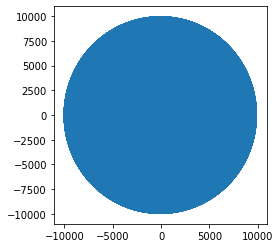

In [211]:
base_lima.buffered.plot()

<AxesSubplot:>

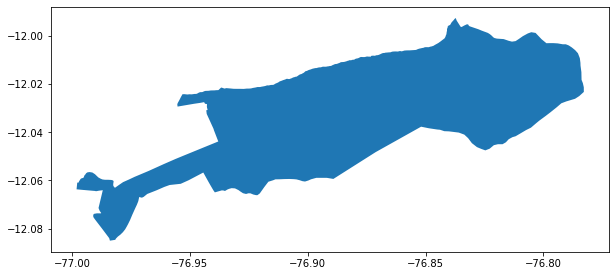

In [209]:
ATE = base_lima[base_lima.UBIGEO == 150103]
ATE.plot(figsize=(10, 10))

<AxesSubplot:>

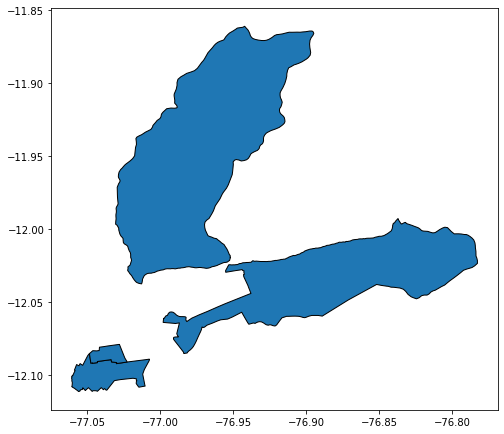

In [212]:
#Plot selectec districs 

ATE = base_lima.loc["ATE", "geometry"]
SJL = base_lima.loc["SAN JUAN DE LURIGANCHO", "geometry"]
SI = base_lima.loc["SAN ISIDRO", "geometry"]
LC = base_lima.loc["LINCE", "geometry"]

gpd.GeoSeries([ATE,SJL,SI,LC]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

## Limits - Boarders

In [214]:
# Logic operations:

# Lince and San Isidro share limits 

LC.touches(SI)

True

In [80]:
LC.touches(ATE)

False

In [215]:
#Distance ATE y (SAN ISIDRO, LINCE)

ATE.distance(SI)

0.021430816237973403

<AxesSubplot:>

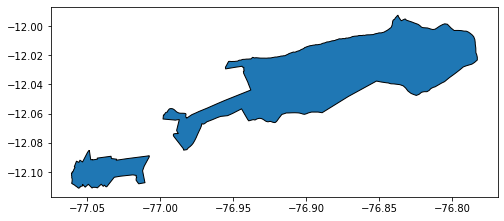

In [217]:
gpd.GeoSeries([ATE, SI]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

In [216]:
ATE.distance(LC)

0.03353670040995021

In [218]:
# Add line that cross Lince and ATE

ate_point = base_lima['centroid']['ATE']
lc_point = base_lima['centroid']['LINCE']
sb_point = base_lima['centroid']['SAN BORJA']
lr_point = base_lima['centroid']['LURIN']
ac_point = base_lima['centroid']['ANCON']


<AxesSubplot:>

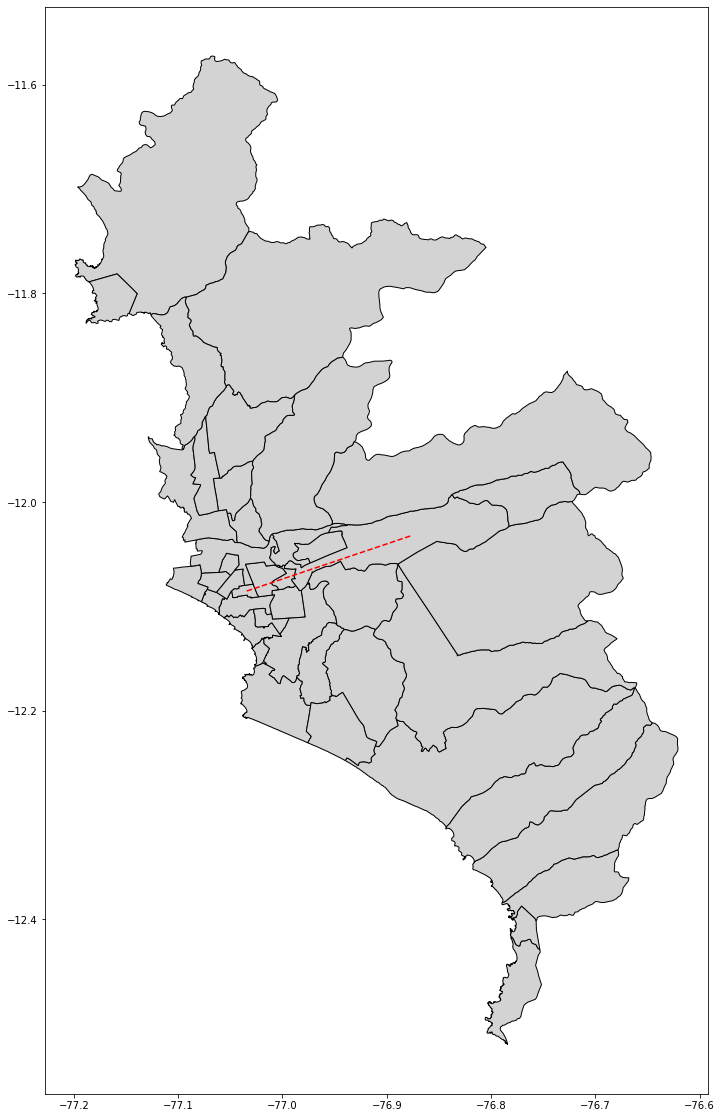

In [219]:
# Add line that cross Lince and ATE

ate_lince = LineString(zip((ate_point.x , lc_point.x ), (ate_point.y, lc_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='lightgray', ax=ax, linestyle='-',
                                    edgecolor='black')

gpd.GeoSeries([ate_lince]).plot(color='red', linestyle='--', ax = ax)

In [85]:
base_lima['area']=base_lima.area
base_lima

C:\Users\Alexander\AppData\Local\Temp\ipykernel_12276\3468981840.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['area']=base_lima.area


UBIGEO  \
Distrito                          
LURIN                    150119   
ANCON                    150102   
SAN ISIDRO               150131   
MAGDALENA DEL MAR        150120   
SAN BORJA                150130   
LINCE                    150116   
SANTIAGO DE SURCO        150140   
PUEBLO LIBRE             150121   
SANTA ROSA               150139   
CARABAYLLO               150106   
JESUS MARIA              150113   
PUCUSANA                 150124   
SANTA MARIA DEL MAR      150138   
CHORRILLOS               150108   
BARRANCO                 150104   
VILLA MARIA DEL TRIUNFO  150143   
SAN JUAN DE MIRAFLORES   150133   
MIRAFLORES               150122   
SURQUILLO                150141   
PUNTA NEGRA              150127   
SAN LUIS                 150134   
SAN MIGUEL               150136   
VILLA EL SALVADOR        150142   
PUNTA HERMOSA            150126   
SAN BARTOLO              150129   
PACHACAMAC               150123   
LA VICTORIA              150115   
LA MOLINA                150114   
BRE<d1>A                 150105   
SANTA ANITA              150137   
CIENEGUILLA              150109   
LIMA                     150101   
EL AGUSTINO              150111   
RIMAC                    150128   
ATE                      150103   
CHACLACAYO               150107   
INDEPENDENCIA            150112   
SAN MARTIN DE PORRES     150135   
LOS OLIVOS               150117   
COMAS                    150110   
LURIGANCHO               150118   
SAN JUAN DE LURIGANCHO   150132   
PUENTE PIEDRA            150125   

                                                                  geometry  \
Distrito                                                                     
LURIN                    POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...   
ANCON                    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...   
SAN ISIDRO               POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...   
MAGDALENA DEL MAR        POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...   
SAN BORJA                POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...   
LINCE                    POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...   
SANTIAGO DE SURCO        POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...   
PUEBLO LIBRE             POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...   
SANTA ROSA               POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...   
CARABAYLLO               POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...   
JESUS MARIA              POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...   
PUCUSANA                 POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...   
SANTA MARIA DEL MAR      MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   
CHORRILLOS               POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...   
BARRANCO                 POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...   
VILLA MARIA DEL TRIUNFO  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...   
SAN JUAN DE MIRAFLORES   POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...   
MIRAFLORES               POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...   
SURQUILLO                POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...   
PUNTA NEGRA              POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...   
SAN LUIS                 POLYGON ((-76.99780 -12.06084, -76.99810 -12.0...   
SAN MIGUEL               POLYGON ((-77.07857 -12.06228, -77.07815 -12.0...   
VILLA EL SALVADOR        POLYGON ((-76.94232 -12.18247, -76.93731 -12.1...   
PUNTA HERMOSA            POLYGON ((-76.65267 -12.19256, -76.65207 -12.1...   
SAN BARTOLO              POLYGON ((-76.67773 -12.33800, -76.67787 -12.3...   
PACHACAMAC               POLYGON ((-76.88134 -12.07220, -76.86137 -12.1...   
LA VICTORIA              POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...   
LA MOLINA                POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...   
BRE<d1>A                 POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...   
SANTA ANITA              POLYGO

In [86]:
#Distamce between San Juan de Lurigancho to other districs 

SJL_point = base_lima['centroid']["SAN JUAN DE LURIGANCHO"]
    
base_lima['distance'] = base_lima['centroid'].distance(SJL_point)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_12276\3552139678.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['distance'] = base_lima['centroid'].distance(SJL_point)


In [87]:
base_lima['distance'].sort_values(ascending=False)

Distrito
PUCUSANA                   0.555547
SANTA MARIA DEL MAR        0.505632
SAN BARTOLO                0.490367
PUNTA NEGRA                0.443395
PUNTA HERMOSA              0.395445
LURIN                      0.334878
VILLA EL SALVADOR          0.274567
ANCON                      0.273336
PACHACAMAC                 0.268347
CHORRILLOS                 0.249065
SANTA ROSA                 0.237993
CIENEGUILLA                0.233781
VILLA MARIA DEL TRIUNFO    0.230486
SAN JUAN DE MIRAFLORES     0.211952
CHACLACAYO                 0.209580
BARRANCO                   0.204123
MIRAFLORES                 0.184133
SANTIAGO DE SURCO          0.181479
SAN MIGUEL                 0.176307
MAGDALENA DEL MAR          0.175867
SURQUILLO                  0.172533
LURIGANCHO                 0.170624
SAN ISIDRO                 0.166317
PUEBLO LIBRE               0.159857
LINCE                      0.153848
SAN BORJA                  0.153424
JESUS MARIA                0.152794
LA MOLINA          

<AxesSubplot:xlabel='Distrito'>

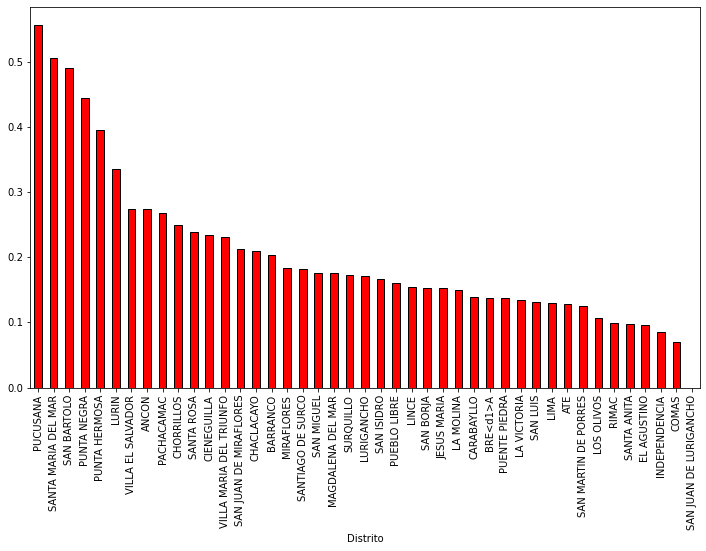

In [88]:

base_lima['distance'].sort_values(ascending=False).plot.bar(figsize=(12, 7), color = 'red', edgecolor='black')

In [89]:
ate_point.type

'Point'

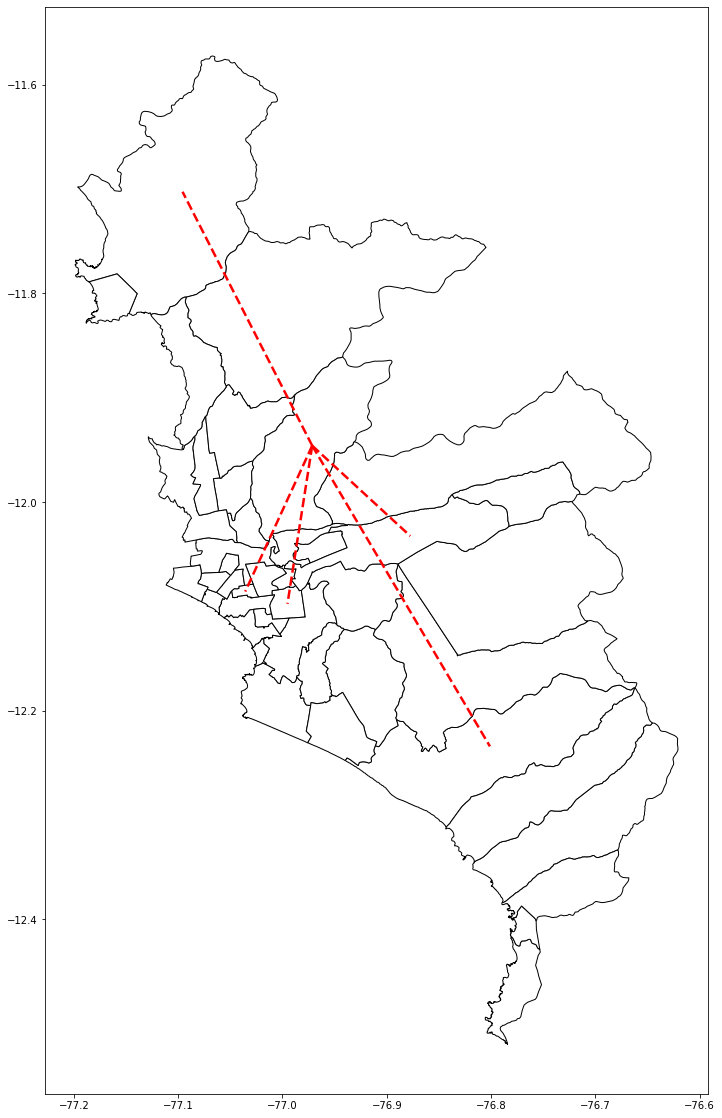

In [90]:
# SJL and other districs 

d1 = LineString(zip((SJL_point.x , lc_point.x ), (SJL_point.y, lc_point.y)))
d2 = LineString(zip((SJL_point.x , ate_point.x ), (SJL_point.y, ate_point.y)))
d3 = LineString(zip((SJL_point.x , sb_point.x ), (SJL_point.y, sb_point.y)))
d4 = LineString(zip((SJL_point.x , lr_point.x ), (SJL_point.y, lr_point.y)))
d5 = LineString(zip((SJL_point.x , ac_point.x ), (SJL_point.y, ac_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='white', ax=ax, linestyle='-',
                                    edgecolor='black')

for i in range(1,6):
    gpd.GeoSeries(globals()[f'd{i}']).plot(color='red', linestyle='--', ax = ax, linewidth = 2.5)



## ArcGis Operations in Geopandas

In [221]:
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

### Get Centroids
Get the centroids of each geometry (district).

In [222]:
dist_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [223]:
dist_shp.to_crs(24891).centroid.to_crs( 4326 )

0        POINT (-75.46643 -9.63426)
1        POINT (-74.86630 -9.00133)
2        POINT (-75.04801 -8.82493)
3        POINT (-75.27987 -8.95039)
4        POINT (-75.04902 -8.64129)
                   ...             
1868     POINT (-76.03798 -9.20808)
1869     POINT (-76.00134 -9.08221)
1870     POINT (-75.98295 -8.98489)
1871    POINT (-70.12642 -15.40623)
1872    POINT (-77.44521 -11.00357)
Length: 1873, dtype: geometry

In [224]:
dist_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We get warnings since we need to reproject this shapefile object to a CRS in meters. This CRS should be a plane area to the specific zone of the shapefile ([more info](https://stackoverflow.com/questions/63004400/getting-a-userwarning-when-calculating-centroid-of-a-geoseries)). In the case of Peru, we use 24891 ([more info](https://epsg.io/24891)).



In [225]:
projected_dist_shp = dist_shp.to_crs( epsg = 24891 )

projected_dist_shp[ 'centroids'] = projected_dist_shp.centroid

Then, we reproject again the centroids to the original CRS.

In [226]:
dist_shp[ 'Centroid_Latitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).y
dist_shp[ 'Centroid_Longitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).x

## Intersection

In [227]:
health_centers = pd.read_csv( r"../_data\salud_places_peru.csv")

In [228]:
ht1 = health_centers[ health_centers.latitud != 0 ]

In [229]:
# Make ht1 a geopandas
ht1_geo = gpd.GeoDataFrame( ht1 , 
                           geometry= gpd.points_from_xy( 
                                      ht1.longitud, 
                                      ht1.latitud))

Check CRS

We found that geolocation is recognized by google maps. We set the CRS that correspond to google maps.

In [230]:
ht1_geo_crs = ht1_geo.set_crs( epsg = 4326 )

Find Ubigeo for each point

In [231]:
# Just take 10% of observations
ht2_geo = ht1_geo_crs.sample( frac = 0.10 )

In [232]:
# Intersect with maps
intersected_ht = gpd.overlay( ht2_geo , maps , how = 'intersection' )

In [235]:
ht2_geo.columns

Index(['id_eess', 'codigo_renaes', 'categoria', 'nombre', 'diresa', 'red',
       'direccion', 'longitud', 'latitud', 'id_ubigeo', 'geometry'],
      dtype='object')

In [234]:
intersected_ht

id_eess  codigo_renaes categoria                              nombre  \
0       14482          12232       I-2          CENTRO  MEDICO  PARROQUIAL   
1        5511          24836       I-1                          CHALLHUANI   
2       12722            314       I-3                  SAN LUIS DE SHUARO   
3       23974            316       I-1                 SANTA HERMINIA BAJA   
4       27112          25202       I-3                    EXALTACION CUSCO   
...       ...            ...       ...                                 ...   
1539     5818           4385       I-1                        HUACA RIVERA   
1540    26342           7312       I-1  PUESTO DE SALUD VIOLETAS ACCOYANCA   
1541    12576           3669       I-2               PUESTO DE SALUD CHACA   
1542    19425           6736       I-1                          SAN RAFAEL   
1543    18990           1649       I-1               PUESTO DE SALUD CUNYA   

            diresa                         red  \
0         APURIMAC                   COCHARCAS   
1         APURIMAC                   COCHARCAS   
2            JUNIN                 CHANCHAMAYO   
3            JUNIN                 CHANCHAMAYO   
4            CUSCO  NO PERTENECE A NINGUNA RED   
...            ...                         ...   
1539    LAMBAYEQUE                  LAMBAYEQUE   
1540  HUANCAVELICA                    TAYACAJA   
1541      AYACUCHO                      HUANTA   
1542      AYACUCHO                    HUAMANGA   
1543        ANCASH               HUAYLAS NORTE   

                                              direccion   longitud    latitud  \
0     JIRÓN JR FRANCISCO BOLOGNESI  S/N S/N JR FRANC... -73.673367 -13.529667   
1     AVENIDA LOSINCAS S/N CARRETERA SALIDA A LA PRO... -73.682148 -13.541508   
2     JIRÓN JR. PROGRESO S/N SAN LUIS DE SHUARO NÚME... -75.288345 -10.888270   
3     PLAZA PLAZA DEL ANEXO SANTA HERMINIA BAJA DIST... -75.232187 -10.770078   
4     AVENIDA LOS INCAS NÚMERO 710 PISO 1 DEPARTAMEN... -71.958035 -13.524402   
...                                                 ...        ...        ...   
1539  OTROS CASERIO HUACA RIVERA CASERIO HUACA RIVER... -79.824483  -6.450002   
1540  PASAJE PSJ DANUBIO S/N - VIOLETAS DE ACCOYANCA... -74.769235 -12.472178   
1541  PLAZA PLAZA PRINCIPAL DE CHACA DISTRITO CHACA ... -74.205622 -12.784157   
1542  PLAZA PLAZA PRINCIPAL DISTRITO SOCOS PROVINCIA... -74.310811 -13.182344   
1543  OTROS CENTRO POBLADO DE CUNYA S/N NÚMERO S/N D... -77.386185  -9.057062   

      id_ubigeo  UBIGEO                     geometry  
0           311   30602  POINT (-73.67337 -13.52967)  
1           311   30602  POINT (-73.68215 -13.54151)  
2          1082  120304  POINT (-75.28835 -10.88827)  
3          1082  120304  POINT (-75.23219 -10.77008)  
4           704   80108  POINT (-71.95803 -13.52440)  
...         ...     ...                          ...  
1539       1277  140309   POINT (-79.82448 -6.45000)  
1540        904   90719  POINT (-74.76924 -12.47218)  
1541        481   50412  POINT (-74.20562 -12.78416)  
1542        455   50112  POINT (-74.31081 -13.18234)  
1543        250   22008   POINT (-77.38618 -9.05706)  

[1544 rows x 12 columns]

## Aggregation

We have shapefiles at district levels. It is possible to aggregate districts at Department or Province level.

<AxesSubplot:>

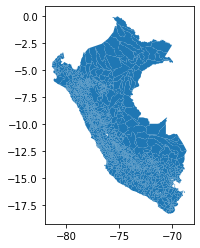

In [236]:
dist_shp.plot()

In [237]:
prov_shp = dist_shp.dissolve( by = 'IDPROV' )

<AxesSubplot:>

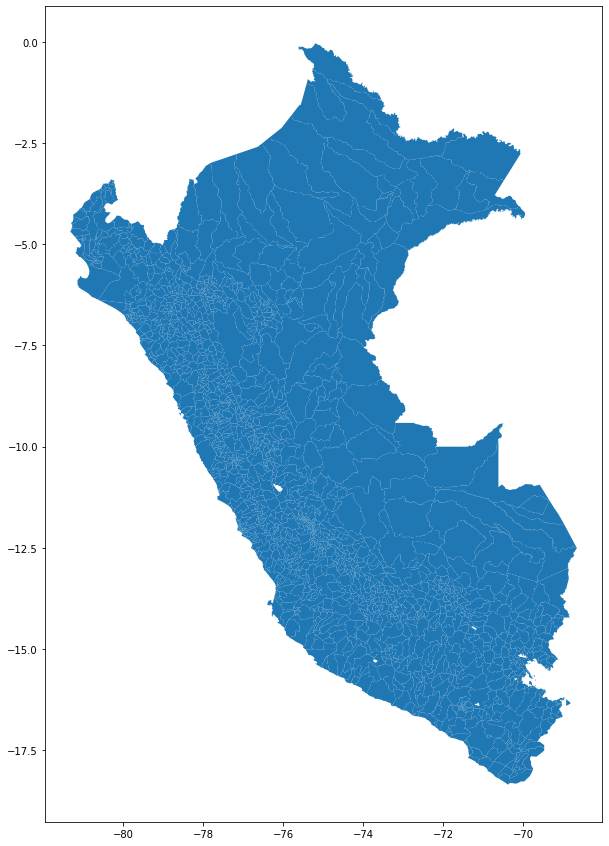

In [238]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )

<AxesSubplot:>

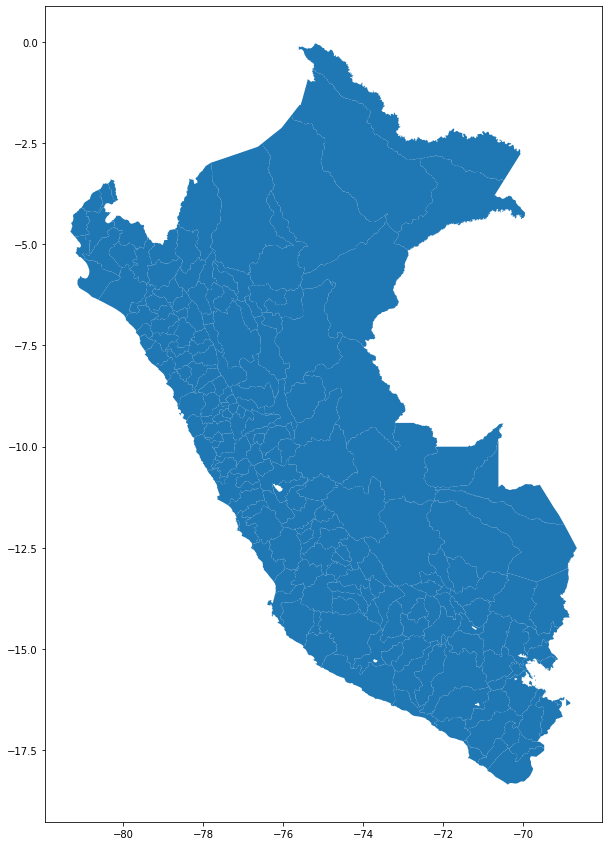

In [239]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( ax = ax )

In [240]:
dpt_shp = dist_shp.dissolve( by = 'IDDPTO' )

<AxesSubplot:>

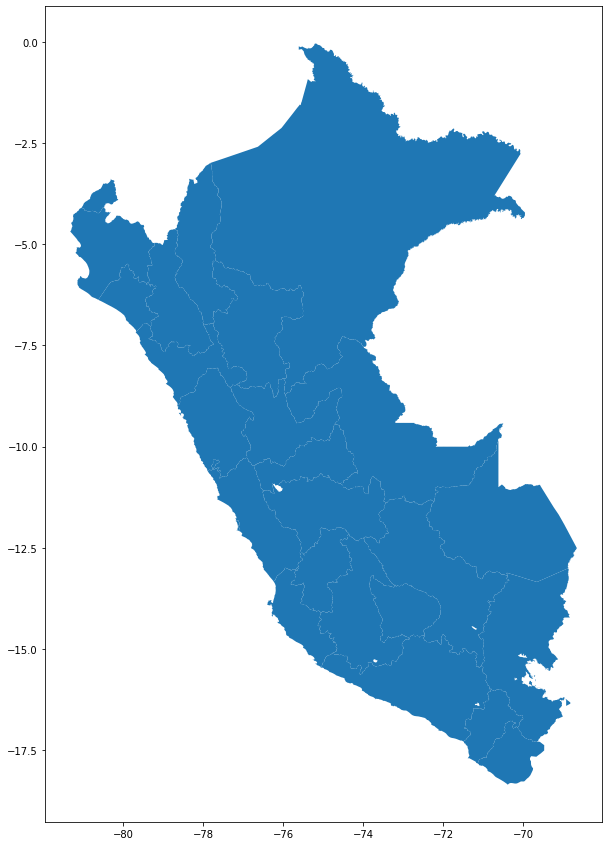

In [241]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

## Checking CRS

In [242]:
# Border of Switzerland
ch_borders = gpd.read_file( r'../_data/eu_maps/CHE_adm0.shp')

# Border of Germany
de_borders = gpd.read_file( r'../_data/eu_maps/gadm36_DEU_0.shp')

# Switzerland lakes shape files
ch_lakes = gpd.GeoDataFrame.from_file( r'../_data/eu_maps/g2s15.shp')

# muni
Geo_muni = gpd.read_file( r"../_data/eu_maps/VG250_GEM.shp" )

Plots with different CRS

(-46058.36469219932, 967356.6919281381, -305024.0777151496, 6406513.607306512)

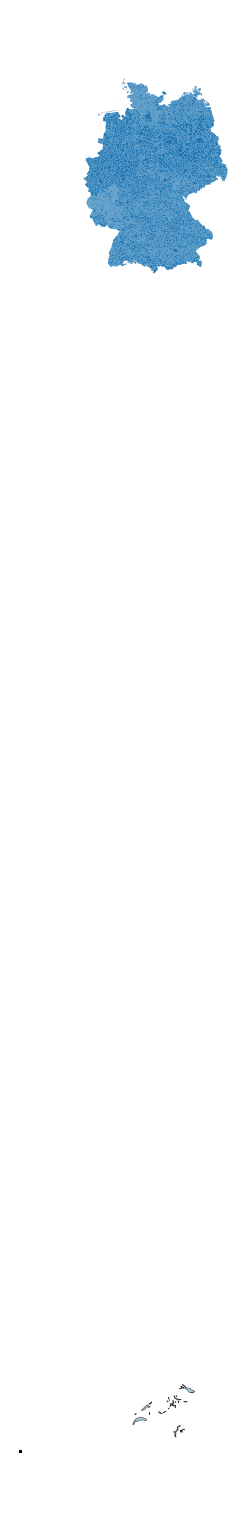

In [243]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni.plot( ax = ax )

# switzerland borders
ch_borders.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
# #ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


Check CRS

In [244]:
shp_files = [ ch_borders, de_borders, ch_lakes, Geo_muni ]

In [245]:
for shp in shp_files:
    print( shp.crs )

epsg:4326
epsg:4326
epsg:21781
epsg:25832


Reproject CRS

In [248]:
Geo_muni_crs = Geo_muni.to_crs( 21781 )

In [249]:
ch_borders_crs = ch_borders.to_crs( 21781 )

(453126.00494657864, 1163640.4776774019, 11798.918320549732, 1157415.473468453)

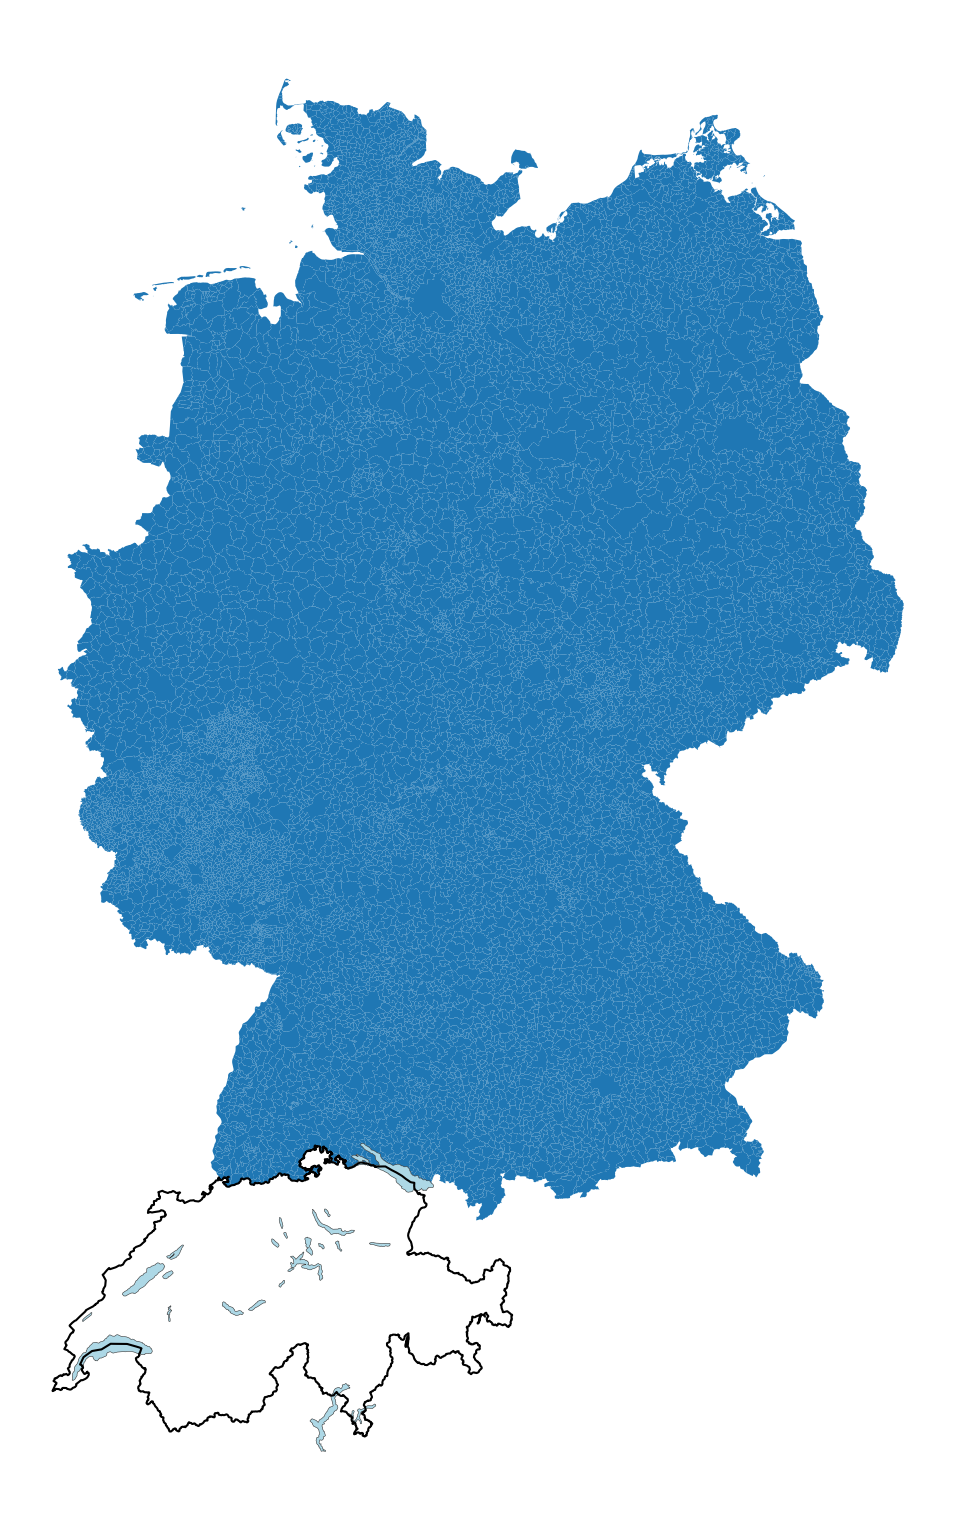

In [250]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni_crs.plot( ax = ax )

# switzerland borders
ch_borders_crs.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
#ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


## References:


### Geopandas
https://geopandas.org/en/stable/docs/user_guide/set_operations.html

https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

https://geopandas.org/en/stable/docs/user_guide/data_structures.html

https://www.kaggle.com/imdevskp/geopandas

### Coordinate Reference System

https://geopandas.org/en/stable/docs/user_guide/projections.html

#### Types of projections

https://spatialreference.org/

#### Universal Transverse Mercator (UTM)

https://manifold.net/doc/mfd9/universal_transverse_mercator_projection.htm

